In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e11/sample_submission.csv
/kaggle/input/playground-series-s4e11/train.csv
/kaggle/input/playground-series-s4e11/test.csv


In [2]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder



from sklearn.metrics import classification_report,confusion_matrix, roc_auc_score, accuracy_score, confusion_matrix, roc_curve

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# **1-Load Data**

In [3]:
df = pd.read_csv('/kaggle/input/playground-series-s4e11/train.csv')
df.head(10)

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0
5,5,Vani,Female,59.0,Ahmedabad,Working Professional,Finanancial Analyst,NaN,2.0,NaN,NaN,5.0,5-6 hours,Healthy,MCA,No,7.0,5.0,No,0
6,6,Ritvik,Male,47.0,Thane,Working Professional,Chemist,NaN,5.0,NaN,NaN,2.0,7-8 hours,Moderate,MD,No,6.0,2.0,No,0
7,7,Rajveer,Male,38.0,Nashik,Working Professional,Teacher,NaN,3.0,NaN,NaN,4.0,7-8 hours,Unhealthy,B.Pharm,No,10.0,3.0,Yes,0
8,8,Aishwarya,Female,24.0,Bangalore,Student,NaN,2.0,NaN,5.90,5.0,NaN,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
9,9,Simran,Female,42.0,Patna,Working Professional,Electrician,NaN,4.0,NaN,NaN,1.0,5-6 hours,Healthy,ME,Yes,7.0,2.0,Yes,0


In [4]:
test = pd.read_csv('/kaggle/input/playground-series-s4e11/test.csv')
test.head(10)

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,140700,Shivam,Male,53.0,Visakhapatnam,Working Professional,Judge,NaN,2.0,NaN,NaN,5.0,Less than 5 hours,Moderate,LLB,No,9.0,3.0,Yes
1,140701,Sanya,Female,58.0,Kolkata,Working Professional,Educational Consultant,NaN,2.0,NaN,NaN,4.0,Less than 5 hours,Moderate,B.Ed,No,6.0,4.0,No
2,140702,Yash,Male,53.0,Jaipur,Working Professional,Teacher,NaN,4.0,NaN,NaN,1.0,7-8 hours,Moderate,B.Arch,Yes,12.0,4.0,No
3,140703,Nalini,Female,23.0,Rajkot,Student,NaN,5.0,NaN,6.84,1.0,NaN,More than 8 hours,Moderate,BSc,Yes,10.0,4.0,No
4,140704,Shaurya,Male,47.0,Kalyan,Working Professional,Teacher,NaN,5.0,NaN,NaN,5.0,7-8 hours,Moderate,BCA,Yes,3.0,4.0,No
5,140705,Kartik,Male,29.0,Mumbai,Working Professional,Customer Support,NaN,2.0,NaN,NaN,3.0,More than 8 hours,Moderate,B.Com,No,3.0,2.0,Yes
6,140706,Armaan,Male,47.0,Visakhapatnam,Working Professional,Teacher,NaN,1.0,NaN,NaN,1.0,Less than 5 hours,Healthy,MA,No,10.0,3.0,Yes
7,140707,Ritika,Female,28.0,Mumbai,Working Professional,Customer Support,NaN,5.0,NaN,NaN,3.0,7-8 hours,Healthy,BA,Yes,0.0,2.0,No
8,140708,Navya,Female,21.0,Surat,Student,NaN,1.0,NaN,7.39,3.0,NaN,Less than 5 hours,Healthy,BBA,No,8.0,1.0,Yes
9,140709,Harsha,Male,21.0,Jaipur,Working Professional,NaN,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Healthy,Class 12,Yes,10.0,4.0,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   27898 non-null   float64
 10  Study Satisfaction                     27897 non-null   

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93800 entries, 0 to 93799
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     93800 non-null  int64  
 1   Name                                   93800 non-null  object 
 2   Gender                                 93800 non-null  object 
 3   Age                                    93800 non-null  float64
 4   City                                   93800 non-null  object 
 5   Working Professional or Student        93800 non-null  object 
 6   Profession                             69168 non-null  object 
 7   Academic Pressure                      18767 non-null  float64
 8   Work Pressure                          75022 non-null  float64
 9   CGPA                                   18766 non-null  float64
 10  Study Satisfaction                     18767 non-null  float64
 11  Jo

In [7]:
missing_values_count = df.isnull().sum()
missing_values_count

id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                36630
Academic Pressure                        112803
Work Pressure                             27918
CGPA                                     112802
Study Satisfaction                       112803
Job Satisfaction                          27910
Sleep Duration                                0
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64

In [8]:
missing_values_count = test.isnull().sum()
missing_values_count

id                                           0
Name                                         0
Gender                                       0
Age                                          0
City                                         0
Working Professional or Student              0
Profession                               24632
Academic Pressure                        75033
Work Pressure                            18778
CGPA                                     75034
Study Satisfaction                       75033
Job Satisfaction                         18774
Sleep Duration                               0
Dietary Habits                               5
Degree                                       2
Have you ever had suicidal thoughts ?        0
Work/Study Hours                             0
Financial Stress                             0
Family History of Mental Illness             0
dtype: int64

# **2-Data Analysis & Handling Missing values**

## **2-1-Profession Column**

<div style="background-color: green; padding: 20px; border-radius: 25px; ">
<font color='white' size="5px">
I checked the relationship of column "Profession" with other columns
    </font>
</div>

In [9]:
df.loc[df['Profession'].isnull()].head(10)

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
8,8,Aishwarya,Female,24.0,Bangalore,Student,NaN,2.0,NaN,5.90,5.0,NaN,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
26,26,Aditya,Male,31.0,Srinagar,Student,NaN,3.0,NaN,7.03,5.0,NaN,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
29,29,Kashish,Female,19.0,Agra,Working Professional,NaN,NaN,1.0,NaN,NaN,5.0,More than 8 hours,Healthy,Class 12,No,5.0,2.0,No,0
30,30,Prisha,Female,28.0,Varanasi,Student,NaN,3.0,NaN,5.59,2.0,NaN,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
32,32,Chhavi,Female,25.0,Jaipur,Student,NaN,4.0,NaN,8.13,3.0,NaN,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0
33,33,Tanmay,Male,29.0,Pune,Student,NaN,2.0,NaN,5.70,3.0,NaN,Less than 5 hours,Healthy,PhD,No,4.0,1.0,No,0
36,36,Anvi,Female,50.0,Kalyan,Working Professional,NaN,NaN,4.0,NaN,NaN,4.0,7-8 hours,Unhealthy,Class 12,No,0.0,2.0,No,0
43,43,Vidya,Female,18.0,Vadodara,Working Professional,NaN,NaN,5.0,NaN,NaN,4.0,Less than 5 hours,Moderate,Class 12,Yes,10.0,5.0,No,1
48,48,Anand,Male,38.0,Ghaziabad,Working Professional,NaN,NaN,2.0,NaN,NaN,5.0,5-6 hours,Moderate,Class 12,No,1.0,1.0,Yes,0


In [10]:
df.loc[df['Profession'].notnull()].head(10)

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0
5,5,Vani,Female,59.0,Ahmedabad,Working Professional,Finanancial Analyst,NaN,2.0,NaN,NaN,5.0,5-6 hours,Healthy,MCA,No,7.0,5.0,No,0
6,6,Ritvik,Male,47.0,Thane,Working Professional,Chemist,NaN,5.0,NaN,NaN,2.0,7-8 hours,Moderate,MD,No,6.0,2.0,No,0
7,7,Rajveer,Male,38.0,Nashik,Working Professional,Teacher,NaN,3.0,NaN,NaN,4.0,7-8 hours,Unhealthy,B.Pharm,No,10.0,3.0,Yes,0
9,9,Simran,Female,42.0,Patna,Working Professional,Electrician,NaN,4.0,NaN,NaN,1.0,5-6 hours,Healthy,ME,Yes,7.0,2.0,Yes,0
10,10,Utkarsh,Male,55.0,Rajkot,Working Professional,Software Engineer,NaN,3.0,NaN,NaN,2.0,7-8 hours,Moderate,BSc,No,6.0,4.0,Yes,0
11,11,Aahana,Female,51.0,Patna,Working Professional,Teacher,NaN,1.0,NaN,NaN,2.0,7-8 hours,Moderate,B.Arch,No,9.0,5.0,No,0


In [11]:
test[['Working Professional or Student', 'Profession']]

,Working Professional or Student,Profession
0,Working Professional,Judge
1,Working Professional,Educational Consultant
2,Working Professional,Teacher
3,Student,NaN
4,Working Professional,Teacher
...,...,...
93795,Working Professional,Pilot
93796,Working Professional,Pilot
93797,Student,NaN
93798,Working Professional,Marketing Manager


In [12]:
df_1 = df[['Working Professional or Student', 'Profession']]
df_1.head()

,Working Professional or Student,Profession
0,Working Professional,Chef
1,Working Professional,Teacher
2,Student,NaN
3,Working Professional,Teacher
4,Working Professional,Business Analyst


In [13]:
print(len(df_1.loc[(df_1['Working Professional or Student']=='Student')&(df_1['Profession']=='Student')]))
print(df_1.loc[(df_1['Working Professional or Student']=='Student')&(df_1['Profession']=='Student')])

3
       Working Professional or Student Profession
20049                          Student    Student
20296                          Student    Student
126162                         Student    Student


In [14]:
ind = df.loc[(df['Working Professional or Student']=='Student') & (df['Profession'].isnull())].index
for i in ind:
    df.loc[i, 'Profession'] = 'Student'

In [15]:
ind = test.loc[(test['Working Professional or Student']=='Student') & (test['Profession'].isnull())].index
for i in ind:
    test.loc[i, 'Profession'] = 'Student'

In [16]:
missing_values_count = df.isnull().sum()
missing_values_count

id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                 8763
Academic Pressure                        112803
Work Pressure                             27918
CGPA                                     112802
Study Satisfaction                       112803
Job Satisfaction                          27910
Sleep Duration                                0
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64

In [17]:
missing_values_count = test.isnull().sum()
missing_values_count

id                                           0
Name                                         0
Gender                                       0
Age                                          0
City                                         0
Working Professional or Student              0
Profession                                5886
Academic Pressure                        75033
Work Pressure                            18778
CGPA                                     75034
Study Satisfaction                       75033
Job Satisfaction                         18774
Sleep Duration                               0
Dietary Habits                               5
Degree                                       2
Have you ever had suicidal thoughts ?        0
Work/Study Hours                             0
Financial Stress                             0
Family History of Mental Illness             0
dtype: int64

In [18]:
df.loc[df['Profession'].isnull()][['Working Professional or Student', 'Profession']]

,Working Professional or Student,Profession
29,Working Professional,NaN
36,Working Professional,NaN
43,Working Professional,NaN
48,Working Professional,NaN
50,Working Professional,NaN
...,...,...
140647,Working Professional,NaN
140655,Working Professional,NaN
140666,Working Professional,NaN
140667,Working Professional,NaN


In [19]:
df.loc[df['Profession'].isnull()][['Degree', 'Profession']]

,Degree,Profession
29,Class 12,NaN
36,Class 12,NaN
43,Class 12,NaN
48,Class 12,NaN
50,Class 12,NaN
...,...,...
140647,Class 12,NaN
140655,PhD,NaN
140666,Class 12,NaN
140667,MHM,NaN


In [20]:
df_2 = df.loc[df['Profession'].isnull()][['Degree', 'Profession']]
df_2.head()

,Degree,Profession
29,Class 12,NaN
36,Class 12,NaN
43,Class 12,NaN
48,Class 12,NaN
50,Class 12,NaN


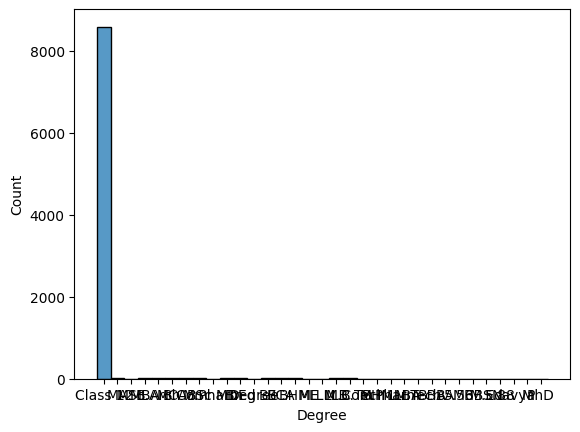

In [21]:
sns.histplot(df_2['Degree']);

In [22]:
df.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,Student,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [23]:
df.loc[(df['Profession']=='Class 12')]

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression


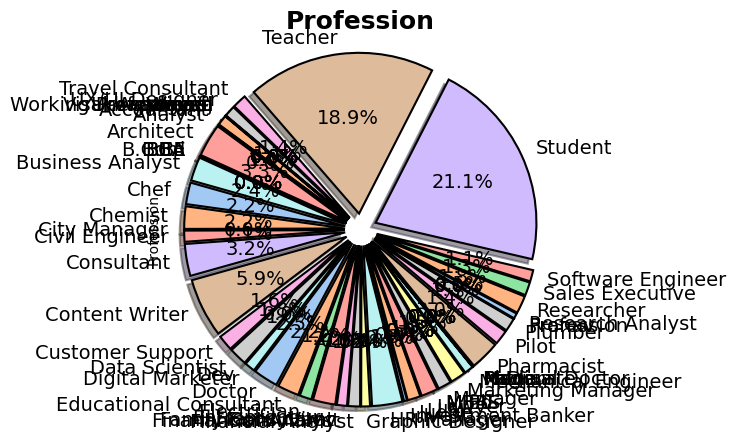

In [24]:

def plot_data(name, data):
    plt.figure(figsize=(5, 5))
    palette_color = sns.color_palette('pastel')
    explode = [0.1 for _ in range(data.nunique())]

    target_counts = df.groupby(name)[name].count()

    target_counts.plot.pie(
    colors=palette_color,
    explode=explode,
    autopct="%1.1f%%",
    shadow=True,
    startangle=140,
    textprops={'fontsize': 14},
    wedgeprops={'edgecolor': 'black', 'linewidth': 1.5} 
    )

    plt.title(name, fontsize=18, weight='bold')
    plt.axis('equal')
    plt.show()

plot_data('Profession', df['Profession'])

In [25]:
Profession_name = df['Profession'].unique()
Profession_name

array(['Chef', 'Teacher', 'Student', 'Business Analyst',
       'Finanancial Analyst', 'Chemist', 'Electrician',
       'Software Engineer', 'Data Scientist', 'Plumber',
       'Marketing Manager', 'Accountant', 'Entrepreneur', 'HR Manager',
       'UX/UI Designer', 'Content Writer', nan, 'Educational Consultant',
       'Civil Engineer', 'Manager', 'Pharmacist', 'Financial Analyst',
       'Architect', 'Mechanical Engineer', 'Customer Support',
       'Consultant', 'Judge', 'Researcher', 'Pilot', 'Graphic Designer',
       'Travel Consultant', 'Digital Marketer', 'Lawyer',
       'Research Analyst', 'Sales Executive', 'Doctor', 'Unemployed',
       'Investment Banker', 'Family Consultant', 'B.Com', 'BE', 'Yogesh',
       'Dev', 'MBA', 'LLM', 'BCA', 'Academic', 'Profession',
       'FamilyVirar', 'City Manager', 'BBA', 'Medical Doctor',
       'Working Professional', 'MBBS', 'Patna', 'Unveil', 'B.Ed',
       'Nagpur', 'Moderate', 'M.Ed', 'Analyst', 'Pranav', 'Visakhapatnam',
       'Ph

In [26]:
ind = df.loc[(df['Degree']=='Class 12') & (df['Profession'].isnull())].index
for i in ind:
    df.loc[i, 'Profession'] = 'Class 12'

In [27]:
test_Profession_name = test['Profession'].unique()
test_Profession_name

array(['Judge', 'Educational Consultant', 'Teacher', 'Student',
       'Customer Support', nan, 'Chemist', 'Content Writer', 'Consultant',
       'HR Manager', 'Research Analyst', 'Digital Marketer',
       'Electrician', 'Marketing Manager', 'Plumber', 'Pharmacist',
       'Lawyer', 'Pilot', 'Architect', 'Chef', 'Graphic Designer',
       'Entrepreneur', 'Manager', 'Mechanical Engineer',
       'Software Engineer', 'Travel Consultant', 'Finanancial Analyst',
       'Financial Analyst', 'Doctor', 'Business Analyst',
       'UX/UI Designer', 'Sales Executive', 'Data Scientist',
       'Accountant', 'Researcher', 'Civil Engineer', 'Investment Banker',
       'Unhealthy', 'B.Ed', 'Working Professional', '3M', 'ME', 'B.Pharm',
       '24th', 'Manvi', 'Yogesh', 'Samar', 'Surat', 'PhD', 'M.Ed', 'MD',
       'Name', 'MCA', 'Simran', 'Analyst', 'Profession', 'Unemployed',
       'BBA', 'M.Tech', 'LLM', 'Surgeon', 'No', 'Unveil',
       'City Consultant', 'M.Pharm'], dtype=object)

In [28]:
ind = test.loc[(test['Degree']=='Class 12') & (test['Profession'].isnull())].index
for i in ind:
    test.loc[i, 'Profession'] = 'Class 12'

In [29]:
missing_values_count = df.isnull().sum()
missing_values_count

id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                  173
Academic Pressure                        112803
Work Pressure                             27918
CGPA                                     112802
Study Satisfaction                       112803
Job Satisfaction                          27910
Sleep Duration                                0
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64

In [30]:
missing_values_count = test.isnull().sum()
missing_values_count

id                                           0
Name                                         0
Gender                                       0
Age                                          0
City                                         0
Working Professional or Student              0
Profession                                 145
Academic Pressure                        75033
Work Pressure                            18778
CGPA                                     75034
Study Satisfaction                       75033
Job Satisfaction                         18774
Sleep Duration                               0
Dietary Habits                               5
Degree                                       2
Have you ever had suicidal thoughts ?        0
Work/Study Hours                             0
Financial Stress                             0
Family History of Mental Illness             0
dtype: int64

In [31]:
df.loc[df['Profession'].isnull()]

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
591,591,Anvi,Female,49.0,Nagpur,Working Professional,NaN,NaN,1.0,NaN,NaN,1.0,Less than 5 hours,Unhealthy,MA,Yes,11.0,3.0,Yes,1
1316,1316,Shlok,Male,38.0,Ludhiana,Working Professional,NaN,NaN,1.0,NaN,NaN,5.0,7-8 hours,Unhealthy,MSc,Yes,1.0,4.0,No,0
2216,2216,Rudra,Male,20.0,Patna,Working Professional,NaN,NaN,3.0,NaN,NaN,4.0,5-6 hours,Unhealthy,MBA,Yes,8.0,4.0,Yes,0
2424,2424,Abhishek,Male,18.0,Vadodara,Working Professional,NaN,NaN,4.0,NaN,NaN,2.0,More than 8 hours,Moderate,B.Arch,Yes,7.0,5.0,Yes,1
3443,3443,Charvi,Female,26.0,Vasai-Virar,Working Professional,NaN,NaN,1.0,NaN,NaN,1.0,More than 8 hours,Unhealthy,MCA,No,10.0,3.0,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138770,138770,Lavanya,Female,54.0,Nagpur,Working Professional,NaN,NaN,3.0,NaN,NaN,2.0,5-6 hours,Moderate,MCA,Yes,7.0,5.0,Yes,0
139506,139506,Tejas,Male,20.0,Ahmedabad,Working Professional,NaN,NaN,4.0,NaN,NaN,4.0,Less than 5 hours,Moderate,BHM,Yes,4.0,4.0,No,1
139674,139674,Armaan,Male,20.0,Varanasi,Working Professional,NaN,NaN,1.0,NaN,NaN,1.0,7-8 hours,Unhealthy,PhD,Yes,9.0,5.0,No,0
140655,140655,Kiran,Male,44.0,Meerut,Working Professional,NaN,NaN,1.0,NaN,NaN,3.0,More than 8 hours,Healthy,PhD,No,0.0,4.0,No,0


In [32]:
df_2 = df.loc[df['Profession'].isnull()][['Age', 'Profession']]
df_2.head()

,Age,Profession
591,49.0,NaN
1316,38.0,NaN
2216,20.0,NaN
2424,18.0,NaN
3443,26.0,NaN


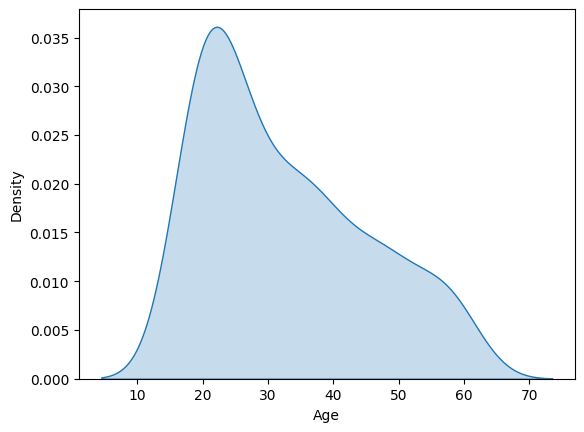

In [33]:
sns.kdeplot(data=df_2['Age'], shade=True);

In [34]:
df.fillna({'Profession': 'Unknown'}, inplace=True)
test.fillna({'Profession': 'Unknown'}, inplace=True)

In [35]:
missing_values_count = df.isnull().sum()
missing_values_count

id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                    0
Academic Pressure                        112803
Work Pressure                             27918
CGPA                                     112802
Study Satisfaction                       112803
Job Satisfaction                          27910
Sleep Duration                                0
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64

In [36]:
missing_values_count = test.isnull().sum()
missing_values_count

id                                           0
Name                                         0
Gender                                       0
Age                                          0
City                                         0
Working Professional or Student              0
Profession                                   0
Academic Pressure                        75033
Work Pressure                            18778
CGPA                                     75034
Study Satisfaction                       75033
Job Satisfaction                         18774
Sleep Duration                               0
Dietary Habits                               5
Degree                                       2
Have you ever had suicidal thoughts ?        0
Work/Study Hours                             0
Financial Stress                             0
Family History of Mental Illness             0
dtype: int64

## **2-2-Academic Pressure Column**

<div style="background-color: green; padding: 20px; border-radius: 25px; ">
<font color='white' size="5px">
I checked the relationship of column "Academic Pressure" with other columns
    </font>
</div>

In [37]:
Profession_name = df['Profession'].unique()
Profession_name

array(['Chef', 'Teacher', 'Student', 'Business Analyst',
       'Finanancial Analyst', 'Chemist', 'Electrician',
       'Software Engineer', 'Data Scientist', 'Plumber',
       'Marketing Manager', 'Accountant', 'Entrepreneur', 'HR Manager',
       'UX/UI Designer', 'Content Writer', 'Class 12',
       'Educational Consultant', 'Civil Engineer', 'Manager',
       'Pharmacist', 'Financial Analyst', 'Architect',
       'Mechanical Engineer', 'Customer Support', 'Consultant', 'Judge',
       'Researcher', 'Pilot', 'Graphic Designer', 'Travel Consultant',
       'Digital Marketer', 'Lawyer', 'Research Analyst',
       'Sales Executive', 'Doctor', 'Unemployed', 'Unknown',
       'Investment Banker', 'Family Consultant', 'B.Com', 'BE', 'Yogesh',
       'Dev', 'MBA', 'LLM', 'BCA', 'Academic', 'Profession',
       'FamilyVirar', 'City Manager', 'BBA', 'Medical Doctor',
       'Working Professional', 'MBBS', 'Patna', 'Unveil', 'B.Ed',
       'Nagpur', 'Moderate', 'M.Ed', 'Analyst', 'Pranav', 'V

In [38]:
test_Profession_name = test['Profession'].unique()
test_Profession_name

array(['Judge', 'Educational Consultant', 'Teacher', 'Student',
       'Customer Support', 'Class 12', 'Chemist', 'Content Writer',
       'Consultant', 'HR Manager', 'Research Analyst', 'Digital Marketer',
       'Electrician', 'Marketing Manager', 'Plumber', 'Pharmacist',
       'Lawyer', 'Pilot', 'Architect', 'Chef', 'Graphic Designer',
       'Entrepreneur', 'Manager', 'Mechanical Engineer',
       'Software Engineer', 'Travel Consultant', 'Finanancial Analyst',
       'Financial Analyst', 'Doctor', 'Business Analyst',
       'UX/UI Designer', 'Sales Executive', 'Data Scientist',
       'Accountant', 'Researcher', 'Civil Engineer', 'Investment Banker',
       'Unhealthy', 'Unknown', 'B.Ed', 'Working Professional', '3M', 'ME',
       'B.Pharm', '24th', 'Manvi', 'Yogesh', 'Samar', 'Surat', 'PhD',
       'M.Ed', 'MD', 'Name', 'MCA', 'Simran', 'Analyst', 'Profession',
       'Unemployed', 'BBA', 'M.Tech', 'LLM', 'Surgeon', 'No', 'Unveil',
       'City Consultant', 'M.Pharm'], dtype=obj

In [39]:
for i in Profession_name:
    x = df.loc[(df['Profession']==i) & (df['Academic Pressure'].notnull())]['Academic Pressure'].mode()
    if len(x)!=0:
        x = int(x[0])
        ind = df.loc[df['Profession']==i].index
        for j in ind:
            df.loc[j, 'Academic Pressure'] = x

In [40]:
for i in test_Profession_name:
    x = test.loc[(test['Profession']==i) & (test['Academic Pressure'].notnull())]['Academic Pressure'].mode()
    if len(x)!=0:
        x = int(x[0])
        ind = test.loc[test['Profession']==i].index
        for j in ind:
            test.loc[j, 'Academic Pressure'] = x

In [41]:
missing_values_count = df.isnull().sum()
missing_values_count

id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                    0
Academic Pressure                         42900
Work Pressure                             27918
CGPA                                     112802
Study Satisfaction                       112803
Job Satisfaction                          27910
Sleep Duration                                0
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64

In [42]:
missing_values_count = test.isnull().sum()
missing_values_count

id                                           0
Name                                         0
Gender                                       0
Age                                          0
City                                         0
Working Professional or Student              0
Profession                                   0
Academic Pressure                        25414
Work Pressure                            18778
CGPA                                     75034
Study Satisfaction                       75033
Job Satisfaction                         18774
Sleep Duration                               0
Dietary Habits                               5
Degree                                       2
Have you ever had suicidal thoughts ?        0
Work/Study Hours                             0
Financial Stress                             0
Family History of Mental Illness             0
dtype: int64

In [43]:
df.loc[df['Academic Pressure'].isnull()]

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0
5,5,Vani,Female,59.0,Ahmedabad,Working Professional,Finanancial Analyst,NaN,2.0,NaN,NaN,5.0,5-6 hours,Healthy,MCA,No,7.0,5.0,No,0
6,6,Ritvik,Male,47.0,Thane,Working Professional,Chemist,NaN,5.0,NaN,NaN,2.0,7-8 hours,Moderate,MD,No,6.0,2.0,No,0
9,9,Simran,Female,42.0,Patna,Working Professional,Electrician,NaN,4.0,NaN,NaN,1.0,5-6 hours,Healthy,ME,Yes,7.0,2.0,Yes,0
10,10,Utkarsh,Male,55.0,Rajkot,Working Professional,Software Engineer,NaN,3.0,NaN,NaN,2.0,7-8 hours,Moderate,BSc,No,6.0,4.0,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140688,140688,Rajat,Male,48.0,Hyderabad,Working Professional,Chemist,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,B.Pharm,No,8.0,4.0,Yes,0
140692,140692,Raunak,Male,49.0,Bhopal,Working Professional,Financial Analyst,NaN,4.0,NaN,NaN,1.0,7-8 hours,Moderate,MBA,No,9.0,1.0,No,0
140693,140693,Shaurya,Male,55.0,Srinagar,Working Professional,Data Scientist,NaN,1.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,M.Tech,No,9.0,2.0,No,0
140697,140697,Aanchal,Female,24.0,Kolkata,Working Professional,Marketing Manager,NaN,3.0,NaN,NaN,1.0,More than 8 hours,Moderate,B.Com,No,4.0,4.0,No,0


In [44]:
test.loc[test['Academic Pressure'].isnull()]

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
1,140701,Sanya,Female,58.0,Kolkata,Working Professional,Educational Consultant,NaN,2.0,NaN,NaN,4.0,Less than 5 hours,Moderate,B.Ed,No,6.0,4.0,No
5,140705,Kartik,Male,29.0,Mumbai,Working Professional,Customer Support,NaN,2.0,NaN,NaN,3.0,More than 8 hours,Moderate,B.Com,No,3.0,2.0,Yes
7,140707,Ritika,Female,28.0,Mumbai,Working Professional,Customer Support,NaN,5.0,NaN,NaN,3.0,7-8 hours,Healthy,BA,Yes,0.0,2.0,No
12,140712,Advait,Male,48.0,Lucknow,Working Professional,Consultant,NaN,3.0,NaN,NaN,1.0,Less than 5 hours,Moderate,B.Com,No,4.0,3.0,No
15,140715,Anvi,Female,29.0,Thane,Working Professional,Research Analyst,NaN,2.0,NaN,NaN,5.0,7-8 hours,Healthy,MBA,No,10.0,1.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93792,234492,Advait,Male,23.0,Delhi,Working Professional,Consultant,NaN,2.0,NaN,NaN,3.0,Less than 5 hours,Moderate,B.Com,Yes,12.0,4.0,No
93795,234495,Zoya,Female,49.0,Jaipur,Working Professional,Pilot,NaN,3.0,NaN,NaN,5.0,Less than 5 hours,Moderate,BSc,Yes,2.0,2.0,Yes
93796,234496,Shlok,Male,29.0,Ahmedabad,Working Professional,Pilot,NaN,5.0,NaN,NaN,1.0,7-8 hours,Moderate,BE,Yes,11.0,3.0,Yes
93798,234498,Eshita,Female,23.0,Kalyan,Working Professional,Marketing Manager,NaN,4.0,NaN,NaN,2.0,5-6 hours,Healthy,BA,Yes,7.0,5.0,Yes


In [45]:
df_2 = df.loc[df['Academic Pressure'].isnull()][['Profession']]
df_2.head()

,Profession
4,Business Analyst
5,Finanancial Analyst
6,Chemist
9,Electrician
10,Software Engineer


In [46]:
df_3 = test.loc[test['Academic Pressure'].isnull()][['Profession']]
df_3.head()

,Profession
1,Educational Consultant
5,Customer Support
7,Customer Support
12,Consultant
15,Research Analyst


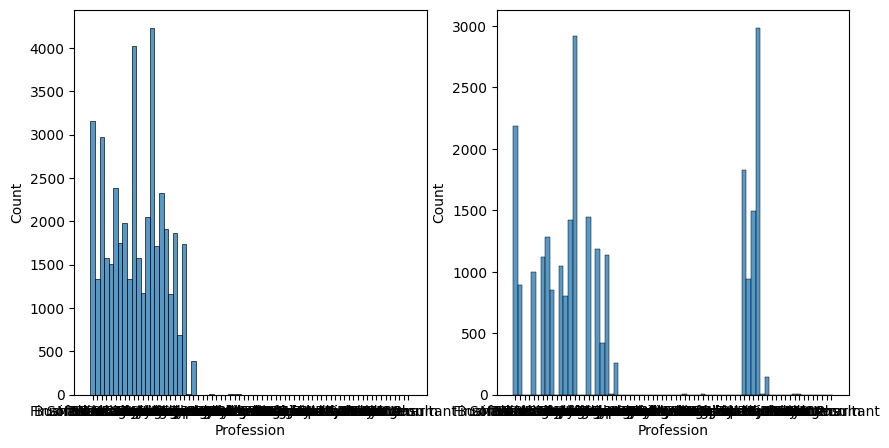

In [47]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10,5))

sns.histplot(df_2['Profession'], ax=axes[0]);
sns.histplot(df_3['Profession'], ax=axes[1]);

In [48]:
print('Profession Train Len: ',len(Profession_name))
print('Profession Test Len: ',len(test_Profession_name))

Profession Train Len:  66
Profession Test Len:  66


In [49]:
Profession_test = df_2['Profession'].unique()
test_Profession_test = df_3['Profession'].unique()

print('Profession Train Len: ',len(Profession_test))
print('Profession Test Len: ',len(test_Profession_test))

Profession Train Len:  50
Profession Test Len:  46


In [50]:
array_Profession_train = []
for i in Profession_test:
    x = df_2.loc[df_2['Profession']==i]
    if len(x)>=1:
        array_Profession_train.append(i)

In [51]:
array_Profession_test = []
for i in test_Profession_test:
    x = df_3.loc[df_3['Profession']==i]
    if len(x)>=1:
        array_Profession_test.append(i)

In [52]:
for i in array_Profession_test:
    x = df.loc[df['Profession']==i][['Academic Pressure']].mode()
    if len(x)!=0:
        print(i, x)

Educational Consultant    Academic Pressure
0                3.0
Digital Marketer    Academic Pressure
0                5.0
Lawyer    Academic Pressure
0                4.0
Architect    Academic Pressure
0                3.0
Unknown    Academic Pressure
0                4.0


In [53]:
test_Profession = {
    'Educational Consultant' : 3,
    'Digital Marketer': 5,
    'Lawyer': 4,
    'Architect' : 3,
    'Unknown' : 4,
    
}

for name, value in test_Profession.items():
    ind = test.loc[test['Profession']==name].index
    for i in ind:
        test.loc[i, 'Academic Pressure'] = value

In [54]:
missing_values_count = test.isnull().sum()
missing_values_count

id                                           0
Name                                         0
Gender                                       0
Age                                          0
City                                         0
Working Professional or Student              0
Profession                                   0
Academic Pressure                        18021
Work Pressure                            18778
CGPA                                     75034
Study Satisfaction                       75033
Job Satisfaction                         18774
Sleep Duration                               0
Dietary Habits                               5
Degree                                       2
Have you ever had suicidal thoughts ?        0
Work/Study Hours                             0
Financial Stress                             0
Family History of Mental Illness             0
dtype: int64

In [55]:
for i in array_Profession_train:
    x = test.loc[test['Profession']==i][['Academic Pressure']].mode()
    if len(x)!=0:
        print(i, x)

Chemist    Academic Pressure
0                3.0
Electrician    Academic Pressure
0                1.0
Data Scientist    Academic Pressure
0                4.0
HR Manager    Academic Pressure
0                5.0
Judge    Academic Pressure
0                4.0
Researcher    Academic Pressure
0                3.0
Graphic Designer    Academic Pressure
0                4.0


In [56]:
train_Profession = {
    'Chemist' : 3,
    'Electrician': 1,
    'Data Scientist': 4,
    'HR Manager' : 5,
    'Judge' : 4,
    'Researcher': 3,
    'Graphic Designer': 4,
    
}

for name, value in train_Profession.items():
    ind = df.loc[df['Profession']==name].index
    for i in ind:
        df.loc[i, 'Academic Pressure'] = value

In [57]:
missing_values_count = df.isnull().sum()
missing_values_count

id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                    0
Academic Pressure                         26736
Work Pressure                             27918
CGPA                                     112802
Study Satisfaction                       112803
Job Satisfaction                          27910
Sleep Duration                                0
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64

In [58]:
df_2 = df.loc[df['Academic Pressure'].isnull()][['Profession']]
df_2.head()

,Profession
4,Business Analyst
5,Finanancial Analyst
10,Software Engineer
14,Plumber
15,Marketing Manager


In [59]:
df_3 = test.loc[test['Academic Pressure'].isnull()][['Profession']]
df_3.head()

,Profession
5,Customer Support
7,Customer Support
12,Consultant
15,Research Analyst
28,Marketing Manager


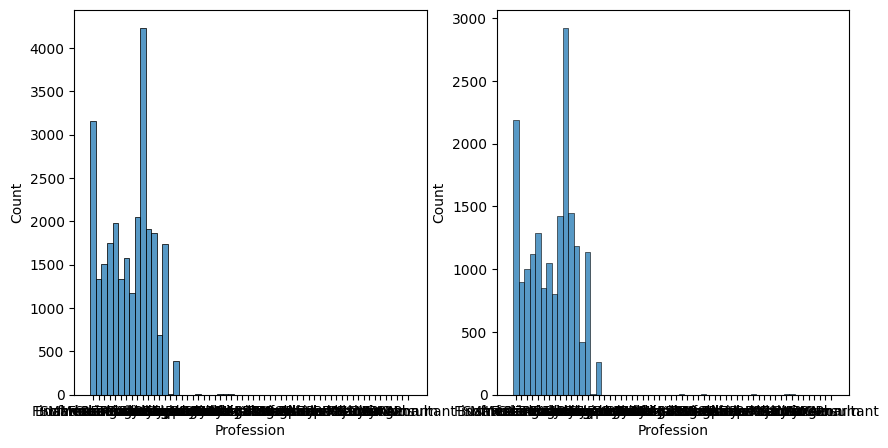

In [60]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10,5))

sns.histplot(df_2['Profession'], ax=axes[0]);
sns.histplot(df_3['Profession'], ax=axes[1]);

In [61]:
array_Profession_train = []
array_Profession_test = []

for i in Profession_test:
    x = df_2.loc[df_2['Profession']==i]
    if len(x)>=1:
        array_Profession_train.append(i)
        
for i in test_Profession_test:
    x = df_3.loc[df_3['Profession']==i]
    if len(x)>=1:
        array_Profession_test.append(i)

In [62]:
array_Profession_train = []
for i in Profession_test:
    x = df_2.loc[df_2['Profession']==i]
    if len(x)>=100:
        array_Profession_train.append(i)

In [63]:
array_Profession_test = []
for i in test_Profession_test:
    x = df_3.loc[df_3['Profession']==i]
    if len(x)>=100:
        array_Profession_test.append(i)

In [64]:
array_Profession_train

['Business Analyst',
 'Finanancial Analyst',
 'Software Engineer',
 'Plumber',
 'Marketing Manager',
 'Accountant',
 'Financial Analyst',
 'Mechanical Engineer',
 'Customer Support',
 'Consultant',
 'Pilot',
 'Travel Consultant',
 'Research Analyst',
 'Sales Executive',
 'Investment Banker']

In [65]:
array_Profession_test

['Customer Support',
 'Consultant',
 'Research Analyst',
 'Marketing Manager',
 'Plumber',
 'Pilot',
 'Mechanical Engineer',
 'Software Engineer',
 'Travel Consultant',
 'Finanancial Analyst',
 'Financial Analyst',
 'Business Analyst',
 'Sales Executive',
 'Accountant',
 'Investment Banker']

In [66]:
Profession_name = df['Profession'].unique()
Profession_name

array(['Chef', 'Teacher', 'Student', 'Business Analyst',
       'Finanancial Analyst', 'Chemist', 'Electrician',
       'Software Engineer', 'Data Scientist', 'Plumber',
       'Marketing Manager', 'Accountant', 'Entrepreneur', 'HR Manager',
       'UX/UI Designer', 'Content Writer', 'Class 12',
       'Educational Consultant', 'Civil Engineer', 'Manager',
       'Pharmacist', 'Financial Analyst', 'Architect',
       'Mechanical Engineer', 'Customer Support', 'Consultant', 'Judge',
       'Researcher', 'Pilot', 'Graphic Designer', 'Travel Consultant',
       'Digital Marketer', 'Lawyer', 'Research Analyst',
       'Sales Executive', 'Doctor', 'Unemployed', 'Unknown',
       'Investment Banker', 'Family Consultant', 'B.Com', 'BE', 'Yogesh',
       'Dev', 'MBA', 'LLM', 'BCA', 'Academic', 'Profession',
       'FamilyVirar', 'City Manager', 'BBA', 'Medical Doctor',
       'Working Professional', 'MBBS', 'Patna', 'Unveil', 'B.Ed',
       'Nagpur', 'Moderate', 'M.Ed', 'Analyst', 'Pranav', 'V

In [67]:
df.loc[df['Academic Pressure'].isnull()]

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0
5,5,Vani,Female,59.0,Ahmedabad,Working Professional,Finanancial Analyst,NaN,2.0,NaN,NaN,5.0,5-6 hours,Healthy,MCA,No,7.0,5.0,No,0
10,10,Utkarsh,Male,55.0,Rajkot,Working Professional,Software Engineer,NaN,3.0,NaN,NaN,2.0,7-8 hours,Moderate,BSc,No,6.0,4.0,Yes,0
14,14,Kiran,Male,50.0,Thane,Working Professional,Plumber,NaN,1.0,NaN,NaN,1.0,More than 8 hours,Moderate,BE,Yes,8.0,5.0,Yes,0
15,15,Aditi,Female,23.0,Patna,Working Professional,Marketing Manager,NaN,2.0,NaN,NaN,2.0,5-6 hours,Healthy,MA,Yes,6.0,4.0,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140678,140678,Rajveer,Male,53.0,Varanasi,Working Professional,Business Analyst,NaN,4.0,NaN,NaN,3.0,7-8 hours,Healthy,MCA,No,12.0,1.0,Yes,0
140682,140682,Raghavendra,Male,42.0,Delhi,Working Professional,Software Engineer,NaN,3.0,NaN,NaN,3.0,5-6 hours,Unhealthy,M.Tech,No,7.0,5.0,Yes,0
140692,140692,Raunak,Male,49.0,Bhopal,Working Professional,Financial Analyst,NaN,4.0,NaN,NaN,1.0,7-8 hours,Moderate,MBA,No,9.0,1.0,No,0
140697,140697,Aanchal,Female,24.0,Kolkata,Working Professional,Marketing Manager,NaN,3.0,NaN,NaN,1.0,More than 8 hours,Moderate,B.Com,No,4.0,4.0,No,0


In [68]:
df_4 = df.loc[df['Academic Pressure'].isnull()][['Degree']]
df_4.head()

,Degree
4,BBA
5,MCA
10,BSc
14,BE
15,MA


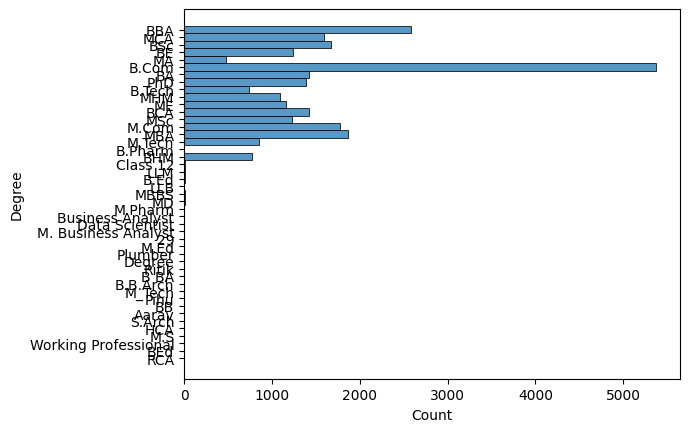

In [69]:
figsize=(20,10)
sns.histplot(data = df_4,y='Degree');

In [70]:
degree = {
    "BCom": "B.Com", "B.Com": "B.Com", "B.Comm": "B.Com",
    "B.Tech": "B.Tech", "BTech": "B.Tech", "B.T": "B.Tech",
    "BSc": "B.Sc", "B.Sc": "B.Sc", "Bachelor of Science": "B.Sc",
    "BArch": "B.Arch", "B.Arch": "B.Arch",
    "BA": "B.A", "B.A": "B.A",
    "BBA": "BBA", "BB": "BBA",
    "BCA": "BCA",
    "BE": "BE",
    "BEd": "B.Ed", "B.Ed": "B.Ed",
    "BPharm": "B.Pharm", "B.Pharm": "B.Pharm",
    "BHM": "BHM",
    "LLB": "LLB", "LL B": "LLB", "LL BA": "LLB", "LL.Com": "LLB", "LLCom": "LLB",
    "MCom": "M.Com", "M.Com": "M.Com",
    "M.Tech": "M.Tech", "MTech": "M.Tech", "M.T": "M.Tech",
    "MSc": "M.Sc", "M.Sc": "M.Sc", "Master of Science": "M.Sc",
    "MBA": "MBA",
    "MCA": "MCA",
    "MD": "MD",
    "ME": "ME",
    "MEd": "M.Ed", "M.Ed": "M.Ed",
    "MArch": "M.Arch", "M.Arch": "M.Arch",
    "MPharm": "M.Pharm", "M.Pharm": "M.Pharm",
    "MA": "MA", "M.A": "MA",
    "MPA": "MPA",
    "LLM": "LLM",
    "PhD": "PhD",
    "MBBS": "MBBS",
    "CA": "CA",
    "Class 12": "Class 12", "12th": "Class 12",
    "Class 11": "Class 11", "11th": "Class 11"
}

df['Degree'] = df['Degree'].map(degree)
test['Degree'] = test['Degree'].map(degree)

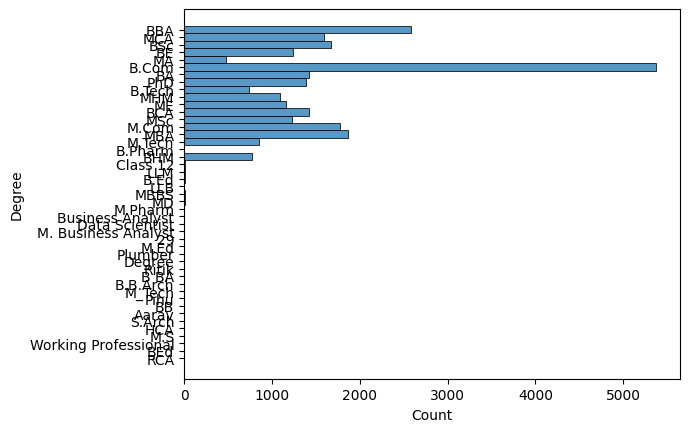

In [71]:
figsize=(20,10)
sns.histplot(data = df_4,y='Degree');

In [72]:
df.loc[(df['Degree']=='BBA') & (df['Working Professional or Student']=='Working Professional')& (df['Academic Pressure'].notnull())][['Academic Pressure']].mode()

,Academic Pressure
0,3.0


In [73]:
Academic_Pressure = {
    'BBA' : 3,
    'MCA': 3,
    'BSc': 3,
    'BE' : 3,
    'MA' : 5,
    'B.Com': 5,
    'BA': 5,
    'PhD': 3,
    'B.Tech': 4,
    'MHM': 2,
    'ME': 5,
    'BCA': 3,
    'MSc': 3,
    'M.Com': 3,
    'MBA': 3,
    'M.Tech': 3,
    'BHM': 2,     
}

for name, value in Academic_Pressure.items():
    ind = df.loc[(df['Degree']==name) & (df['Working Professional or Student']=='Working Professional')& (df['Academic Pressure'].isnull())].index
    for i in ind:
        df.loc[i, 'Academic Pressure'] = value

for name, value in Academic_Pressure.items():
    ind = test.loc[(test['Degree']==name) & (test['Working Professional or Student']=='Working Professional')& (test['Academic Pressure'].isnull())].index
    for i in ind:
        test.loc[i, 'Academic Pressure'] = value

In [74]:
missing_values_count = df.isnull().sum()
missing_values_count

id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                    0
Academic Pressure                          5490
Work Pressure                             27918
CGPA                                     112802
Study Satisfaction                       112803
Job Satisfaction                          27910
Sleep Duration                                0
Dietary Habits                                4
Degree                                     3379
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64

In [75]:
missing_values_count = test.isnull().sum()
missing_values_count

id                                           0
Name                                         0
Gender                                       0
Age                                          0
City                                         0
Working Professional or Student              0
Profession                                   0
Academic Pressure                         3722
Work Pressure                            18778
CGPA                                     75034
Study Satisfaction                       75033
Job Satisfaction                         18774
Sleep Duration                               0
Dietary Habits                               5
Degree                                    2211
Have you ever had suicidal thoughts ?        0
Work/Study Hours                             0
Financial Stress                             0
Family History of Mental Illness             0
dtype: int64

In [76]:
Academic_Pressure_med=df['Academic Pressure'].median()
df.fillna({'Academic Pressure':Academic_Pressure_med}, inplace=True)
test.fillna({'Academic Pressure':Academic_Pressure_med}, inplace=True)

In [77]:
missing_values_count = df.isnull().sum()
missing_values_count

id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                    0
Academic Pressure                             0
Work Pressure                             27918
CGPA                                     112802
Study Satisfaction                       112803
Job Satisfaction                          27910
Sleep Duration                                0
Dietary Habits                                4
Degree                                     3379
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64

## **2-3-Study Satisfaction Column**

<div style="background-color: green; padding: 20px; border-radius: 25px; ">
<font color='white' size="5px">
I checked the relationship of column "Study Satisfaction" with other columns
    </font>
</div>

In [78]:
df.head(10)

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,2.0,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,3.0,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,Student,3.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,3.0,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,3.0,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0
5,5,Vani,Female,59.0,Ahmedabad,Working Professional,Finanancial Analyst,3.0,2.0,NaN,NaN,5.0,5-6 hours,Healthy,MCA,No,7.0,5.0,No,0
6,6,Ritvik,Male,47.0,Thane,Working Professional,Chemist,3.0,5.0,NaN,NaN,2.0,7-8 hours,Moderate,MD,No,6.0,2.0,No,0
7,7,Rajveer,Male,38.0,Nashik,Working Professional,Teacher,3.0,3.0,NaN,NaN,4.0,7-8 hours,Unhealthy,B.Pharm,No,10.0,3.0,Yes,0
8,8,Aishwarya,Female,24.0,Bangalore,Student,Student,3.0,NaN,5.90,5.0,NaN,5-6 hours,Moderate,B.Sc,No,3.0,2.0,Yes,0
9,9,Simran,Female,42.0,Patna,Working Professional,Electrician,1.0,4.0,NaN,NaN,1.0,5-6 hours,Healthy,ME,Yes,7.0,2.0,Yes,0


In [79]:
df.groupby('Study Satisfaction').groups

{1.0: [59, 94, 239, 285, 301, 316, 328, 336, 340, 343, 347, 348, 441, 447, 457, 475, 491, 510, 523, 534, 535, 539, 543, 592, 609, 611, 620, 623, 660, 673, 676, 710, 750, 779, 781, 821, 847, 863, 912, 941, 953, 991, 995, 997, 1006, 1015, 1032, 1047, 1093, 1134, 1148, 1152, 1187, 1222, 1240, 1275, 1301, 1319, 1328, 1391, 1393, 1457, 1472, 1593, 1605, 1618, 1643, 1655, 1657, 1701, 1762, 1850, 1969, 2006, 2060, 2068, 2097, 2108, 2127, 2147, 2183, 2203, 2226, 2294, 2295, 2343, 2385, 2399, 2406, 2423, 2431, 2460, 2471, 2482, 2592, 2633, 2674, 2685, 2687, 2695, ...], 2.0: [2, 30, 120, 139, 208, 255, 270, 274, 303, 337, 454, 455, 467, 509, 530, 538, 589, 617, 658, 683, 707, 708, 733, 735, 737, 746, 758, 759, 763, 813, 839, 843, 852, 861, 949, 955, 956, 1003, 1012, 1029, 1049, 1087, 1105, 1186, 1201, 1213, 1225, 1232, 1254, 1307, 1360, 1379, 1384, 1453, 1467, 1493, 1498, 1501, 1515, 1580, 1609, 1623, 1629, 1659, 1709, 1769, 1770, 1864, 1876, 1908, 1922, 1925, 1928, 1932, 1952, 1970, 1985, 2051,

In [80]:
Profession_name = df['Profession'].unique()
Profession_name

array(['Chef', 'Teacher', 'Student', 'Business Analyst',
       'Finanancial Analyst', 'Chemist', 'Electrician',
       'Software Engineer', 'Data Scientist', 'Plumber',
       'Marketing Manager', 'Accountant', 'Entrepreneur', 'HR Manager',
       'UX/UI Designer', 'Content Writer', 'Class 12',
       'Educational Consultant', 'Civil Engineer', 'Manager',
       'Pharmacist', 'Financial Analyst', 'Architect',
       'Mechanical Engineer', 'Customer Support', 'Consultant', 'Judge',
       'Researcher', 'Pilot', 'Graphic Designer', 'Travel Consultant',
       'Digital Marketer', 'Lawyer', 'Research Analyst',
       'Sales Executive', 'Doctor', 'Unemployed', 'Unknown',
       'Investment Banker', 'Family Consultant', 'B.Com', 'BE', 'Yogesh',
       'Dev', 'MBA', 'LLM', 'BCA', 'Academic', 'Profession',
       'FamilyVirar', 'City Manager', 'BBA', 'Medical Doctor',
       'Working Professional', 'MBBS', 'Patna', 'Unveil', 'B.Ed',
       'Nagpur', 'Moderate', 'M.Ed', 'Analyst', 'Pranav', 'V

In [81]:
test_Profession_name = test['Profession'].unique()
test_Profession_name

array(['Judge', 'Educational Consultant', 'Teacher', 'Student',
       'Customer Support', 'Class 12', 'Chemist', 'Content Writer',
       'Consultant', 'HR Manager', 'Research Analyst', 'Digital Marketer',
       'Electrician', 'Marketing Manager', 'Plumber', 'Pharmacist',
       'Lawyer', 'Pilot', 'Architect', 'Chef', 'Graphic Designer',
       'Entrepreneur', 'Manager', 'Mechanical Engineer',
       'Software Engineer', 'Travel Consultant', 'Finanancial Analyst',
       'Financial Analyst', 'Doctor', 'Business Analyst',
       'UX/UI Designer', 'Sales Executive', 'Data Scientist',
       'Accountant', 'Researcher', 'Civil Engineer', 'Investment Banker',
       'Unhealthy', 'Unknown', 'B.Ed', 'Working Professional', '3M', 'ME',
       'B.Pharm', '24th', 'Manvi', 'Yogesh', 'Samar', 'Surat', 'PhD',
       'M.Ed', 'MD', 'Name', 'MCA', 'Simran', 'Analyst', 'Profession',
       'Unemployed', 'BBA', 'M.Tech', 'LLM', 'Surgeon', 'No', 'Unveil',
       'City Consultant', 'M.Pharm'], dtype=obj

In [82]:
for i in test_Profession_name:
    x = test.loc[(test['Profession']==i) & (test['Study Satisfaction'].notnull())]['Study Satisfaction'].mode()
    if len(x)!=0:
        x = int(x[0])
        ind = test.loc[test['Profession']==i].index
        for j in ind:
            test.loc[j, 'Study Satisfaction'] = x

In [83]:
for i in Profession_name:
    x = df.loc[(df['Profession']==i) & (df['Study Satisfaction'].notnull())]['Study Satisfaction'].mode()
    if len(x)!=0:
        x = int(x[0])
        ind = df.loc[df['Profession']==i].index
        for j in ind:
            df.loc[j, 'Study Satisfaction'] = x

In [84]:
missing_values_count = test.isnull().sum()
missing_values_count

id                                           0
Name                                         0
Gender                                       0
Age                                          0
City                                         0
Working Professional or Student              0
Profession                                   0
Academic Pressure                            0
Work Pressure                            18778
CGPA                                     75034
Study Satisfaction                       25269
Job Satisfaction                         18774
Sleep Duration                               0
Dietary Habits                               5
Degree                                    2211
Have you ever had suicidal thoughts ?        0
Work/Study Hours                             0
Financial Stress                             0
Family History of Mental Illness             0
dtype: int64

In [85]:
df.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,2.0,5.0,NaN,3.0,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,3.0,4.0,NaN,1.0,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,Student,3.0,NaN,8.97,4.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,3.0,5.0,NaN,1.0,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,3.0,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [86]:
print(len(df.loc[(df['Study Satisfaction'].isnull()) & (df['Working Professional or Student']=='Working Professional')][['Study Satisfaction']]))
print(len(df.loc[(df['Study Satisfaction'].isnull()) & (df['Working Professional or Student']=='Student')][['Study Satisfaction']]))

42900
0


In [87]:
print(len(df.loc[(df['Study Satisfaction'].notnull()) & (df['Profession']=='Teacher')][['Study Satisfaction']]))
print(len(df.loc[(df['Study Satisfaction'].isnull()) & (df['Profession']=='Teacher')][['Study Satisfaction']]))

24906
0


In [88]:
Degree_name = df['Degree'].unique()
Degree_name

array(['BHM', 'LLB', 'B.Pharm', 'BBA', 'MCA', 'MD', 'B.Sc', 'ME',
       'B.Arch', 'BCA', 'BE', 'MA', 'B.Ed', 'B.Com', 'MBA', 'M.Com', nan,
       'B.A', 'Class 12', 'M.Tech', 'PhD', 'M.Ed', 'M.Sc', 'B.Tech',
       'LLM', 'MBBS', 'M.Pharm', 'MPA', 'Class 11', 'M.Arch'],
      dtype=object)

In [89]:
for i in Degree_name:
    x = len(df.loc[(df['Study Satisfaction'].notnull()) & (df['Degree']==i)][['Study Satisfaction']])
    y = len(df.loc[(df['Study Satisfaction'].isnull()) & (df['Degree']==i)][['Study Satisfaction']])
    print(i, 'notnull: ', x, 'isnull: ', y)

BHM notnull:  3531 isnull:  774
LLB notnull:  3423 isnull:  927
B.Pharm notnull:  4869 isnull:  989
BBA notnull:  1680 isnull:  3351
MCA notnull:  2729 isnull:  2505
MD notnull:  2741 isnull:  642
B.Sc notnull:  2395 isnull:  2635
ME notnull:  1404 isnull:  2228
B.Arch notnull:  8742 isnull:  2
BCA notnull:  2936 isnull:  2803
BE notnull:  1354 isnull:  1750
MA notnull:  1752 isnull:  1135
B.Ed notnull:  11683 isnull:  10
B.Com notnull:  2733 isnull:  5380
MBA notnull:  1576 isnull:  2242
M.Com notnull:  1321 isnull:  1773
nan notnull:  0 isnull:  0
B.A notnull:  2079 isnull:  1671
Class 12 notnull:  14707 isnull:  22
M.Tech notnull:  2345 isnull:  2131
PhD notnull:  1129 isnull:  1974
M.Ed notnull:  5668 isnull:  2
M.Sc notnull:  2437 isnull:  2442
B.Tech notnull:  2161 isnull:  2264
LLM notnull:  3861 isnull:  786
MBBS notnull:  2870 isnull:  212
M.Pharm notnull:  3407 isnull:  1131
MPA notnull:  1 isnull:  0
Class 11 notnull:  1 isnull:  0
M.Arch notnull:  5 isnull:  0


In [90]:
for i in Degree_name:
    x = df.loc[(df['Degree']==i) & (df['Study Satisfaction'].notnull())]['Study Satisfaction'].mode()
    if len(x)!=0:
        x = int(x[0])
        ind = df.loc[df['Degree']==i].index
        for j in ind:
            df.loc[j, 'Study Satisfaction'] = x

In [91]:
missing_values_count = df.isnull().sum()
missing_values_count

id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                    0
Academic Pressure                             0
Work Pressure                             27918
CGPA                                     112802
Study Satisfaction                         1119
Job Satisfaction                          27910
Sleep Duration                                0
Dietary Habits                                4
Degree                                     3379
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64

In [92]:
test_Degree_name = test['Degree'].unique()
test_Degree_name

array(['LLB', 'B.Ed', 'B.Arch', 'B.Sc', 'BCA', 'B.Com', 'MA', 'B.A',
       'BBA', 'Class 12', 'MD', 'MBA', 'M.Ed', 'M.Pharm', 'BHM', 'LLM',
       'PhD', 'M.Com', 'BE', 'MBBS', 'B.Tech', 'ME', 'MCA', 'B.Pharm',
       nan, 'M.Tech', 'M.Sc', 'M.Arch'], dtype=object)

In [93]:
for i in test_Degree_name:
    x = len(test.loc[(test['Study Satisfaction'].notnull()) & (test['Degree']==i)][['Study Satisfaction']])
    y = len(test.loc[(test['Study Satisfaction'].isnull()) & (test['Degree']==i)][['Study Satisfaction']])
    print(i, 'notnull: ', x, 'isnull: ', y)

LLB notnull:  2337 isnull:  601
B.Ed notnull:  6575 isnull:  1188
B.Arch notnull:  4201 isnull:  1837
B.Sc notnull:  1956 isnull:  1362
BCA notnull:  2668 isnull:  1201
B.Com notnull:  1410 isnull:  4029
MA notnull:  1538 isnull:  395
B.A notnull:  1271 isnull:  1219
BBA notnull:  1663 isnull:  1724
Class 12 notnull:  9803 isnull:  9
MD notnull:  2280 isnull:  9
MBA notnull:  1246 isnull:  1224
M.Ed notnull:  3071 isnull:  636
M.Pharm notnull:  2992 isnull:  5
BHM notnull:  2288 isnull:  488
LLM notnull:  2235 isnull:  898
PhD notnull:  1081 isnull:  992
M.Com notnull:  772 isnull:  1356
BE notnull:  1190 isnull:  976
MBBS notnull:  2027 isnull:  6
B.Tech notnull:  2306 isnull:  583
ME notnull:  1493 isnull:  898
MCA notnull:  2099 isnull:  1339
B.Pharm notnull:  3986 isnull:  4
nan notnull:  0 isnull:  0
M.Tech notnull:  2360 isnull:  657
M.Sc notnull:  2174 isnull:  922
M.Arch notnull:  4 isnull:  5


In [94]:
for i in test_Degree_name:
    x = test.loc[(test['Degree']==i) & (test['Study Satisfaction'].notnull())]['Study Satisfaction'].mode()
    if len(x)!=0:
        x = int(x[0])
        ind = test.loc[test['Degree']==i].index
        for j in ind:
            test.loc[j, 'Study Satisfaction'] = x

In [95]:
missing_values_count = test.isnull().sum()
missing_values_count

id                                           0
Name                                         0
Gender                                       0
Age                                          0
City                                         0
Working Professional or Student              0
Profession                                   0
Academic Pressure                            0
Work Pressure                            18778
CGPA                                     75034
Study Satisfaction                         706
Job Satisfaction                         18774
Sleep Duration                               0
Dietary Habits                               5
Degree                                    2211
Have you ever had suicidal thoughts ?        0
Work/Study Hours                             0
Financial Stress                             0
Family History of Mental Illness             0
dtype: int64

In [96]:
Study_Satisfaction_med=df['Study Satisfaction'].median()
df.fillna({'Study Satisfaction':Study_Satisfaction_med}, inplace=True)
test.fillna({'Study Satisfaction':Study_Satisfaction_med}, inplace=True)

In [97]:
missing_values_count = test.isnull().sum()
missing_values_count

id                                           0
Name                                         0
Gender                                       0
Age                                          0
City                                         0
Working Professional or Student              0
Profession                                   0
Academic Pressure                            0
Work Pressure                            18778
CGPA                                     75034
Study Satisfaction                           0
Job Satisfaction                         18774
Sleep Duration                               0
Dietary Habits                               5
Degree                                    2211
Have you ever had suicidal thoughts ?        0
Work/Study Hours                             0
Financial Stress                             0
Family History of Mental Illness             0
dtype: int64

## **2-4-Work Pressure Column**

<div style="background-color: green; padding: 20px; border-radius: 25px; ">
<font color='white' size="5px">
I checked the relationship of column "Work Pressure" with other columns
    </font>
</div>

In [98]:
df.head(10)

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,2.0,5.0,NaN,3.0,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,3.0,4.0,NaN,1.0,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,Student,3.0,NaN,8.97,1.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,3.0,5.0,NaN,4.0,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,3.0,1.0,NaN,4.0,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0
5,5,Vani,Female,59.0,Ahmedabad,Working Professional,Finanancial Analyst,3.0,2.0,NaN,4.0,5.0,5-6 hours,Healthy,MCA,No,7.0,5.0,No,0
6,6,Ritvik,Male,47.0,Thane,Working Professional,Chemist,3.0,5.0,NaN,1.0,2.0,7-8 hours,Moderate,MD,No,6.0,2.0,No,0
7,7,Rajveer,Male,38.0,Nashik,Working Professional,Teacher,3.0,3.0,NaN,1.0,4.0,7-8 hours,Unhealthy,B.Pharm,No,10.0,3.0,Yes,0
8,8,Aishwarya,Female,24.0,Bangalore,Student,Student,3.0,NaN,5.90,4.0,NaN,5-6 hours,Moderate,B.Sc,No,3.0,2.0,Yes,0
9,9,Simran,Female,42.0,Patna,Working Professional,Electrician,1.0,4.0,NaN,4.0,1.0,5-6 hours,Healthy,ME,Yes,7.0,2.0,Yes,0


In [99]:
Profession_name = df['Profession'].unique()
Profession_name

array(['Chef', 'Teacher', 'Student', 'Business Analyst',
       'Finanancial Analyst', 'Chemist', 'Electrician',
       'Software Engineer', 'Data Scientist', 'Plumber',
       'Marketing Manager', 'Accountant', 'Entrepreneur', 'HR Manager',
       'UX/UI Designer', 'Content Writer', 'Class 12',
       'Educational Consultant', 'Civil Engineer', 'Manager',
       'Pharmacist', 'Financial Analyst', 'Architect',
       'Mechanical Engineer', 'Customer Support', 'Consultant', 'Judge',
       'Researcher', 'Pilot', 'Graphic Designer', 'Travel Consultant',
       'Digital Marketer', 'Lawyer', 'Research Analyst',
       'Sales Executive', 'Doctor', 'Unemployed', 'Unknown',
       'Investment Banker', 'Family Consultant', 'B.Com', 'BE', 'Yogesh',
       'Dev', 'MBA', 'LLM', 'BCA', 'Academic', 'Profession',
       'FamilyVirar', 'City Manager', 'BBA', 'Medical Doctor',
       'Working Professional', 'MBBS', 'Patna', 'Unveil', 'B.Ed',
       'Nagpur', 'Moderate', 'M.Ed', 'Analyst', 'Pranav', 'V

In [100]:
for i in Profession_name:
    x = len(df.loc[(df['Work Pressure'].notnull()) & (df['Profession']==i)][['Work Pressure']])
    y = len(df.loc[(df['Work Pressure'].isnull()) & (df['Profession']==i)][['Work Pressure']])
    print(i, 'notnull: ', x, 'isnull: ', y)

Chef notnull:  2860 isnull:  2
Teacher notnull:  24900 isnull:  6
Student notnull:  7 isnull:  27867
Business Analyst notnull:  3161 isnull:  0
Finanancial Analyst notnull:  1329 isnull:  0
Chemist notnull:  2967 isnull:  0
Electrician notnull:  1582 isnull:  0
Software Engineer notnull:  1510 isnull:  0
Data Scientist notnull:  2390 isnull:  0
Plumber notnull:  1748 isnull:  0
Marketing Manager notnull:  1976 isnull:  0
Accountant notnull:  1339 isnull:  0
Entrepreneur notnull:  2967 isnull:  1
HR Manager notnull:  4022 isnull:  0
UX/UI Designer notnull:  1451 isnull:  1
Content Writer notnull:  7811 isnull:  3
Class 12 notnull:  8577 isnull:  13
Educational Consultant notnull:  2851 isnull:  1
Civil Engineer notnull:  1469 isnull:  1
Manager notnull:  1736 isnull:  1
Pharmacist notnull:  3891 isnull:  2
Financial Analyst notnull:  1574 isnull:  0
Architect notnull:  4362 isnull:  8
Mechanical Engineer notnull:  1176 isnull:  1
Customer Support notnull:  2055 isnull:  0
Consultant not

In [101]:
for i in Profession_name:
    x = df.loc[(df['Profession']==i) & (df['Work Pressure'].notnull())]['Work Pressure'].mode()
    if len(x)!=0:
        x = int(x[0])
        ind = df.loc[df['Profession']==i].index
        for j in ind:
            df.loc[j, 'Work Pressure'] = x

In [102]:
missing_values_count = df.isnull().sum()
missing_values_count

id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                    0
Academic Pressure                             0
Work Pressure                                 0
CGPA                                     112802
Study Satisfaction                            0
Job Satisfaction                          27910
Sleep Duration                                0
Dietary Habits                                4
Degree                                     3379
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64

In [103]:
test_Profession_name = test['Profession'].unique()
test_Profession_name

array(['Judge', 'Educational Consultant', 'Teacher', 'Student',
       'Customer Support', 'Class 12', 'Chemist', 'Content Writer',
       'Consultant', 'HR Manager', 'Research Analyst', 'Digital Marketer',
       'Electrician', 'Marketing Manager', 'Plumber', 'Pharmacist',
       'Lawyer', 'Pilot', 'Architect', 'Chef', 'Graphic Designer',
       'Entrepreneur', 'Manager', 'Mechanical Engineer',
       'Software Engineer', 'Travel Consultant', 'Finanancial Analyst',
       'Financial Analyst', 'Doctor', 'Business Analyst',
       'UX/UI Designer', 'Sales Executive', 'Data Scientist',
       'Accountant', 'Researcher', 'Civil Engineer', 'Investment Banker',
       'Unhealthy', 'Unknown', 'B.Ed', 'Working Professional', '3M', 'ME',
       'B.Pharm', '24th', 'Manvi', 'Yogesh', 'Samar', 'Surat', 'PhD',
       'M.Ed', 'MD', 'Name', 'MCA', 'Simran', 'Analyst', 'Profession',
       'Unemployed', 'BBA', 'M.Tech', 'LLM', 'Surgeon', 'No', 'Unveil',
       'City Consultant', 'M.Pharm'], dtype=obj

In [104]:
for i in test_Profession_name:
    x = test.loc[(test['Profession']==i) & (test['Work Pressure'].notnull())]['Work Pressure'].mode()
    if len(x)!=0:
        x = int(x[0])
        ind = test.loc[test['Profession']==i].index
        for j in ind:
            test.loc[j, 'Work Pressure'] = x

In [105]:
missing_values_count = test.isnull().sum()
missing_values_count

id                                           0
Name                                         0
Gender                                       0
Age                                          0
City                                         0
Working Professional or Student              0
Profession                                   0
Academic Pressure                            0
Work Pressure                                2
CGPA                                     75034
Study Satisfaction                           0
Job Satisfaction                         18774
Sleep Duration                               0
Dietary Habits                               5
Degree                                    2211
Have you ever had suicidal thoughts ?        0
Work/Study Hours                             0
Financial Stress                             0
Family History of Mental Illness             0
dtype: int64

In [106]:
Work_Pressure_med=df['Work Pressure'].median()
df.fillna({'Work Pressure':Work_Pressure_med}, inplace=True)
test.fillna({'Work Pressure':Work_Pressure_med}, inplace=True)

In [107]:
missing_values_count = test.isnull().sum()
missing_values_count

id                                           0
Name                                         0
Gender                                       0
Age                                          0
City                                         0
Working Professional or Student              0
Profession                                   0
Academic Pressure                            0
Work Pressure                                0
CGPA                                     75034
Study Satisfaction                           0
Job Satisfaction                         18774
Sleep Duration                               0
Dietary Habits                               5
Degree                                    2211
Have you ever had suicidal thoughts ?        0
Work/Study Hours                             0
Financial Stress                             0
Family History of Mental Illness             0
dtype: int64

## **2-5-Job Satisfaction Column**

<div style="background-color: green; padding: 20px; border-radius: 25px; ">
<font color='white' size="5px">
I checked the relationship of column "Job Satisfaction" with other columns
    </font>
</div>

In [108]:
df.head(10)

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,2.0,5.0,NaN,3.0,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,3.0,2.0,NaN,1.0,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,Student,3.0,3.0,8.97,1.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,3.0,2.0,NaN,4.0,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,3.0,2.0,NaN,4.0,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0
5,5,Vani,Female,59.0,Ahmedabad,Working Professional,Finanancial Analyst,3.0,5.0,NaN,4.0,5.0,5-6 hours,Healthy,MCA,No,7.0,5.0,No,0
6,6,Ritvik,Male,47.0,Thane,Working Professional,Chemist,3.0,2.0,NaN,1.0,2.0,7-8 hours,Moderate,MD,No,6.0,2.0,No,0
7,7,Rajveer,Male,38.0,Nashik,Working Professional,Teacher,3.0,2.0,NaN,1.0,4.0,7-8 hours,Unhealthy,B.Pharm,No,10.0,3.0,Yes,0
8,8,Aishwarya,Female,24.0,Bangalore,Student,Student,3.0,3.0,5.90,4.0,NaN,5-6 hours,Moderate,B.Sc,No,3.0,2.0,Yes,0
9,9,Simran,Female,42.0,Patna,Working Professional,Electrician,1.0,3.0,NaN,4.0,1.0,5-6 hours,Healthy,ME,Yes,7.0,2.0,Yes,0


In [109]:
print('Working Professional & Job Satisfaction = isnaull :',len(df.loc[(df['Job Satisfaction'].isnull()) & (df['Working Professional or Student']=='Working Professional')][['Job Satisfaction']]))
print('Working Professional & Job Satisfaction = notnaull :',len(df.loc[(df['Job Satisfaction'].notnull()) & (df['Working Professional or Student']=='Working Professional')][['Job Satisfaction']]))

print('Student & Job Satisfaction = isnaull :',len(df.loc[(df['Job Satisfaction'].isnull()) & (df['Working Professional or Student']=='Student')][['Job Satisfaction']]))
print('Student & Job Satisfaction = notnaull :',len(df.loc[(df['Job Satisfaction'].notnull()) & (df['Working Professional or Student']=='Student')][['Job Satisfaction']]))

Working Professional & Job Satisfaction = isnaull : 17
Working Professional & Job Satisfaction = notnaull : 112782
Student & Job Satisfaction = isnaull : 27893
Student & Job Satisfaction = notnaull : 8


In [110]:
for i in Degree_name:
    x = len(df.loc[(df['Job Satisfaction'].notnull()) & (df['Degree']==i) & (df['Working Professional or Student']=='Working Professional')][['Job Satisfaction']])
    y = len(df.loc[(df['Job Satisfaction'].isnull()) & (df['Degree']==i) & (df['Working Professional or Student']=='Working Professional')][['Job Satisfaction']])
    print(i, 'notnull: ', x, 'isnull: ', y)

BHM notnull:  3379 isnull:  1
LLB notnull:  3679 isnull:  0
B.Pharm notnull:  5046 isnull:  1
BBA notnull:  4335 isnull:  0
MCA notnull:  4190 isnull:  0
MD notnull:  2810 isnull:  1
B.Sc notnull:  4141 isnull:  0
ME notnull:  3447 isnull:  0
B.Arch notnull:  7264 isnull:  1
BCA notnull:  4306 isnull:  0
BE notnull:  2491 isnull:  0
MA notnull:  2343 isnull:  0
B.Ed notnull:  9824 isnull:  2
B.Com notnull:  6607 isnull:  0
MBA notnull:  3256 isnull:  0
M.Com notnull:  2360 isnull:  0
nan notnull:  0 isnull:  0
B.A notnull:  3150 isnull:  0
Class 12 notnull:  8638 isnull:  11
M.Tech notnull:  3454 isnull:  0
PhD notnull:  2581 isnull:  0
M.Ed notnull:  4849 isnull:  0
M.Sc notnull:  3689 isnull:  0
B.Tech notnull:  3273 isnull:  0
LLM notnull:  4165 isnull:  0
MBBS notnull:  2386 isnull:  0
M.Pharm notnull:  3956 isnull:  0
MPA notnull:  0 isnull:  0
Class 11 notnull:  0 isnull:  0
M.Arch notnull:  5 isnull:  0


In [111]:
for i in Degree_name:
    x = df.loc[(df['Degree']==i) & (df['Job Satisfaction'].notnull()) & (df['Working Professional or Student']=='Working Professional')]['Job Satisfaction'].mode()
    if len(x)!=0:
        x = int(x[0])
        ind = df.loc[df['Degree']==i].index
        for j in ind:
            df.loc[j, 'Job Satisfaction'] = x

In [112]:
for i in Degree_name:
    x = df.loc[(df['Degree']==i) & (df['Job Satisfaction'].notnull()) & (df['Working Professional or Student']=='Student')]['Job Satisfaction'].mode()
    if len(x)!=0:
        x = int(x[0])
        ind = df.loc[df['Degree']==i].index
        for j in ind:
            df.loc[j, 'Job Satisfaction'] = x

In [113]:
missing_values_count = df.isnull().sum()
missing_values_count

id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                    0
Academic Pressure                             0
Work Pressure                                 0
CGPA                                     112802
Study Satisfaction                            0
Job Satisfaction                            223
Sleep Duration                                0
Dietary Habits                                4
Degree                                     3379
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64

In [114]:
test_Degree_name = test['Degree'].unique()
test_Degree_name

array(['LLB', 'B.Ed', 'B.Arch', 'B.Sc', 'BCA', 'B.Com', 'MA', 'B.A',
       'BBA', 'Class 12', 'MD', 'MBA', 'M.Ed', 'M.Pharm', 'BHM', 'LLM',
       'PhD', 'M.Com', 'BE', 'MBBS', 'B.Tech', 'ME', 'MCA', 'B.Pharm',
       nan, 'M.Tech', 'M.Sc', 'M.Arch'], dtype=object)

In [115]:
for i in test_Degree_name:
    x = test.loc[(test['Degree']==i) & (test['Job Satisfaction'].notnull()) & (test['Working Professional or Student']=='Working Professional')]['Job Satisfaction'].mode()
    if len(x)!=0:
        x = int(x[0])
        ind = test.loc[test['Degree']==i].index
        for j in ind:
            test.loc[j, 'Job Satisfaction'] = x

In [116]:
for i in test_Degree_name:
    x = test.loc[(test['Degree']==i) & (test['Job Satisfaction'].notnull()) & (test['Working Professional or Student']=='Student')]['Job Satisfaction'].mode()
    if len(x)!=0:
        x = int(x[0])
        ind = test.loc[test['Degree']==i].index
        for j in ind:
            test.loc[j, 'Job Satisfaction'] = x

In [117]:
missing_values_count = test.isnull().sum()
missing_values_count

id                                           0
Name                                         0
Gender                                       0
Age                                          0
City                                         0
Working Professional or Student              0
Profession                                   0
Academic Pressure                            0
Work Pressure                                0
CGPA                                     75034
Study Satisfaction                           0
Job Satisfaction                           139
Sleep Duration                               0
Dietary Habits                               5
Degree                                    2211
Have you ever had suicidal thoughts ?        0
Work/Study Hours                             0
Financial Stress                             0
Family History of Mental Illness             0
dtype: int64

In [118]:
missing_values_count = df.isnull().sum()
missing_values_count

id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                    0
Academic Pressure                             0
Work Pressure                                 0
CGPA                                     112802
Study Satisfaction                            0
Job Satisfaction                            223
Sleep Duration                                0
Dietary Habits                                4
Degree                                     3379
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64

In [119]:
Job_Satisfaction_med=df['Job Satisfaction'].median()
df.fillna({'Job Satisfaction':Job_Satisfaction_med}, inplace=True)
test.fillna({'Job Satisfaction':Job_Satisfaction_med}, inplace=True)

In [120]:
missing_values_count = df.isnull().sum()
missing_values_count

id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                    0
Academic Pressure                             0
Work Pressure                                 0
CGPA                                     112802
Study Satisfaction                            0
Job Satisfaction                              0
Sleep Duration                                0
Dietary Habits                                4
Degree                                     3379
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64

## **2-6-CGPA Column**

<div style="background-color: green; padding: 20px; border-radius: 25px; ">
<font color='white' size="5px">
I checked the relationship of column "CGPA" with other columns
    </font>
</div>

In [121]:
df.head(10)

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,2.0,5.0,NaN,3.0,5.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,3.0,2.0,NaN,1.0,2.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,Student,3.0,3.0,8.97,1.0,2.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,3.0,2.0,NaN,4.0,2.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,3.0,2.0,NaN,4.0,2.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0
5,5,Vani,Female,59.0,Ahmedabad,Working Professional,Finanancial Analyst,3.0,5.0,NaN,4.0,5.0,5-6 hours,Healthy,MCA,No,7.0,5.0,No,0
6,6,Ritvik,Male,47.0,Thane,Working Professional,Chemist,3.0,2.0,NaN,1.0,2.0,7-8 hours,Moderate,MD,No,6.0,2.0,No,0
7,7,Rajveer,Male,38.0,Nashik,Working Professional,Teacher,3.0,2.0,NaN,1.0,2.0,7-8 hours,Unhealthy,B.Pharm,No,10.0,3.0,Yes,0
8,8,Aishwarya,Female,24.0,Bangalore,Student,Student,3.0,3.0,5.90,4.0,2.0,5-6 hours,Moderate,B.Sc,No,3.0,2.0,Yes,0
9,9,Simran,Female,42.0,Patna,Working Professional,Electrician,1.0,3.0,NaN,4.0,2.0,5-6 hours,Healthy,ME,Yes,7.0,2.0,Yes,0


In [122]:
print('Working Professional & CGPA = isnaull :',len(df.loc[(df['CGPA'].isnull()) & (df['Working Professional or Student']=='Working Professional')][['CGPA']]))
print('Working Professional & CGPA = notnaull :',len(df.loc[(df['CGPA'].notnull()) & (df['Working Professional or Student']=='Working Professional')][['CGPA']]))

print('Student & CGPA = isnaull :',len(df.loc[(df['CGPA'].isnull()) & (df['Working Professional or Student']=='Student')][['CGPA']]))
print('Student & CGPA = notnaull :',len(df.loc[(df['CGPA'].notnull()) & (df['Working Professional or Student']=='Student')][['CGPA']]))

Working Professional & CGPA = isnaull : 112793
Working Professional & CGPA = notnaull : 6
Student & CGPA = isnaull : 9
Student & CGPA = notnaull : 27892


In [123]:
df.loc[(df['CGPA'].notnull()) & (df['Working Professional or Student']=='Working Professional')][['CGPA']]

,CGPA
18752,8.14
41915,8.04
55827,8.11
60348,9.72
99062,5.42
101189,8.24


In [124]:
df.loc[(df['CGPA'].notnull()) & (df['Working Professional or Student']=='Student')][['CGPA']].head()

,CGPA
2,8.97
8,5.90
26,7.03
30,5.59
32,8.13


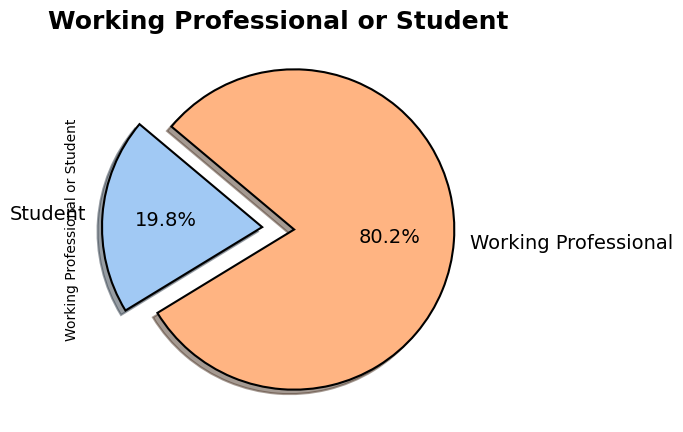

In [125]:
plot_data('Working Professional or Student', df['Working Professional or Student'])

## **2-7-Sleep Duration Column**

<div style="background-color: green; padding: 20px; border-radius: 25px; ">
<font color='white' size="5px">
I normalized the "Sleep Duration" column values
    </font>
</div>

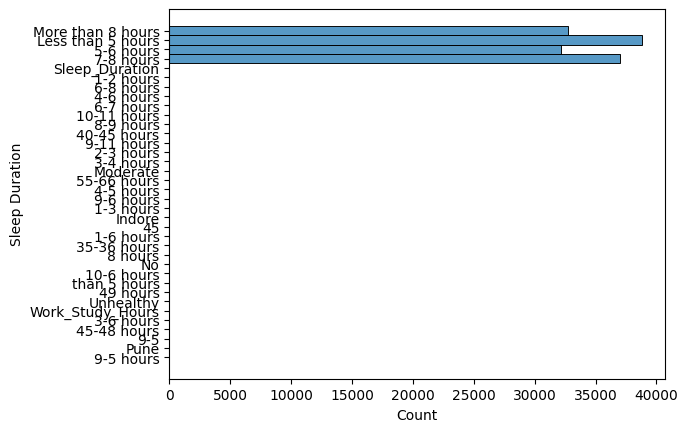

In [126]:
figsize=(20,10)
sns.histplot(data = df ,y='Sleep Duration');

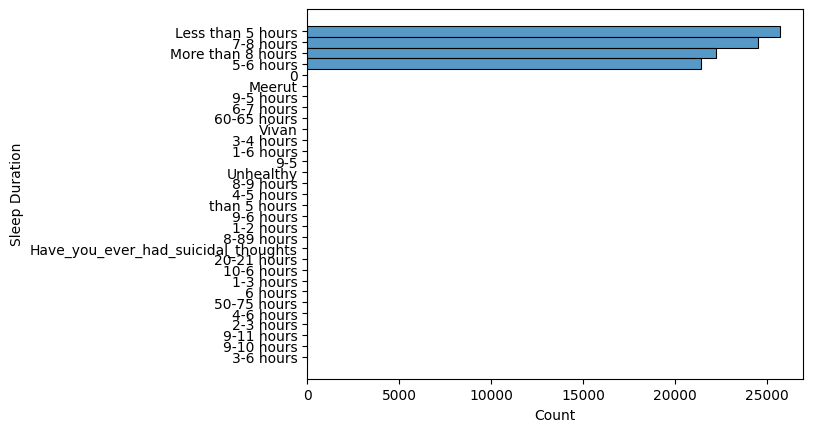

In [127]:
figsize=(20,10)
sns.histplot(data = test ,y='Sleep Duration');

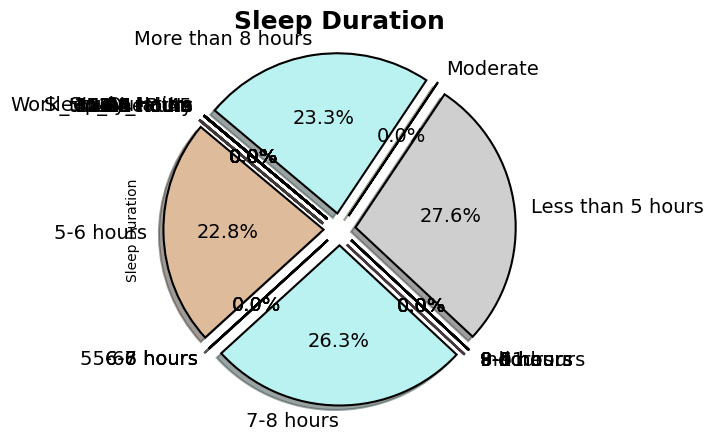

In [128]:
plot_data('Sleep Duration', df['Sleep Duration'])

In [129]:
df['Sleep Duration'].unique()

array(['More than 8 hours', 'Less than 5 hours', '5-6 hours', '7-8 hours',
       'Sleep_Duration', '1-2 hours', '6-8 hours', '4-6 hours',
       '6-7 hours', '10-11 hours', '8-9 hours', '40-45 hours',
       '9-11 hours', '2-3 hours', '3-4 hours', 'Moderate', '55-66 hours',
       '4-5 hours', '9-6 hours', '1-3 hours', 'Indore', '45', '1-6 hours',
       '35-36 hours', '8 hours', 'No', '10-6 hours', 'than 5 hours',
       '49 hours', 'Unhealthy', 'Work_Study_Hours', '3-6 hours',
       '45-48 hours', '9-5', 'Pune', '9-5 hours'], dtype=object)

In [130]:
Sleep_Duration={
        "More than 8 hours":9,
        'Less than 5 hours':4,
        '5-6 hours':5.5,
        '7-8 hours':7.5,
        '1-2 hours':1.5,
        '6-8 hours':7,
        '4-6 hours':5,
        '6-7 hours':6.5,
        '10-11 hours':10.5,
        '8-9 hours':8.5,
        '9-11 hours':10,
        '2-3 hours':2.5,
        '3-4 hours':3.5,
        'Moderate':6,
        '4-5 hours':4.5,
        '9-6 hours':7.5,
        '1-3 hours':2,
        '1-6 hours':4,
        '8 hours':8,
        '10-6 hours':8,
        'Unhealthy':3,
        'Work_Study_Hours':6,
        '3-6 hours':3.5,
        '9-5':7,
        '9-5 hours':7,
}

df['Sleep Duration'] = df['Sleep Duration'].map(Sleep_Duration)
test['Sleep Duration'] = test['Sleep Duration'].map(Sleep_Duration)

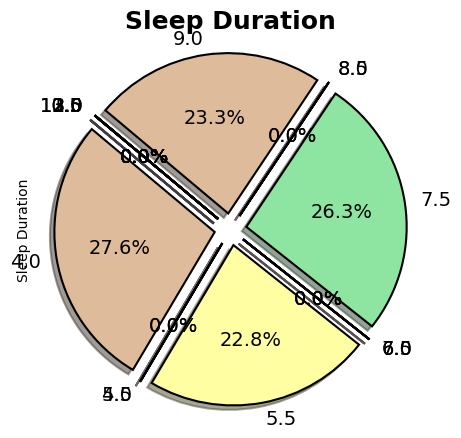

In [131]:
plot_data('Sleep Duration', df['Sleep Duration'])

In [132]:
missing_values_count = df.isnull().sum()
missing_values_count

id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                    0
Academic Pressure                             0
Work Pressure                                 0
CGPA                                     112802
Study Satisfaction                            0
Job Satisfaction                              0
Sleep Duration                               16
Dietary Habits                                4
Degree                                     3379
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64

In [133]:
missing_values_count = test.isnull().sum()
missing_values_count

id                                           0
Name                                         0
Gender                                       0
Age                                          0
City                                         0
Working Professional or Student              0
Profession                                   0
Academic Pressure                            0
Work Pressure                                0
CGPA                                     75034
Study Satisfaction                           0
Job Satisfaction                             0
Sleep Duration                              12
Dietary Habits                               5
Degree                                    2211
Have you ever had suicidal thoughts ?        0
Work/Study Hours                             0
Financial Stress                             0
Family History of Mental Illness             0
dtype: int64

In [134]:
sleep_med=df['Sleep Duration'].median()
df.fillna({'Sleep Duration':sleep_med}, inplace=True)
test.fillna({'Sleep Duration':sleep_med}, inplace=True)

In [135]:
missing_values_count = df.isnull().sum()
missing_values_count

id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                    0
Academic Pressure                             0
Work Pressure                                 0
CGPA                                     112802
Study Satisfaction                            0
Job Satisfaction                              0
Sleep Duration                                0
Dietary Habits                                4
Degree                                     3379
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64

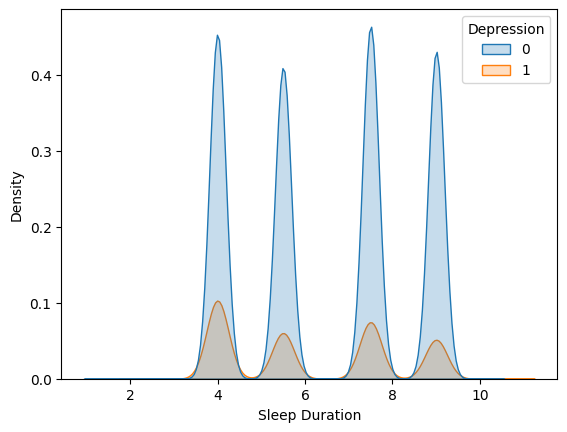

In [136]:
figsize=(20,10)
sns.kdeplot(data=df, x='Sleep Duration', hue='Depression', shade=True);

## **2-8-Dietary Habits Column**

<div style="background-color: green; padding: 20px; border-radius: 25px; ">
<font color='white' size="5px">
I normalized the "Dietary Habits" column values
    </font>
</div>

In [137]:
df.head(10)

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,2.0,5.0,NaN,3.0,5.0,9.0,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,3.0,2.0,NaN,1.0,2.0,4.0,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,Student,3.0,3.0,8.97,1.0,2.0,5.5,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,3.0,2.0,NaN,4.0,2.0,4.0,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,3.0,2.0,NaN,4.0,2.0,5.5,Unhealthy,BBA,Yes,9.0,4.0,Yes,0
5,5,Vani,Female,59.0,Ahmedabad,Working Professional,Finanancial Analyst,3.0,5.0,NaN,4.0,5.0,5.5,Healthy,MCA,No,7.0,5.0,No,0
6,6,Ritvik,Male,47.0,Thane,Working Professional,Chemist,3.0,2.0,NaN,1.0,2.0,7.5,Moderate,MD,No,6.0,2.0,No,0
7,7,Rajveer,Male,38.0,Nashik,Working Professional,Teacher,3.0,2.0,NaN,1.0,2.0,7.5,Unhealthy,B.Pharm,No,10.0,3.0,Yes,0
8,8,Aishwarya,Female,24.0,Bangalore,Student,Student,3.0,3.0,5.90,4.0,2.0,5.5,Moderate,B.Sc,No,3.0,2.0,Yes,0
9,9,Simran,Female,42.0,Patna,Working Professional,Electrician,1.0,3.0,NaN,4.0,2.0,5.5,Healthy,ME,Yes,7.0,2.0,Yes,0


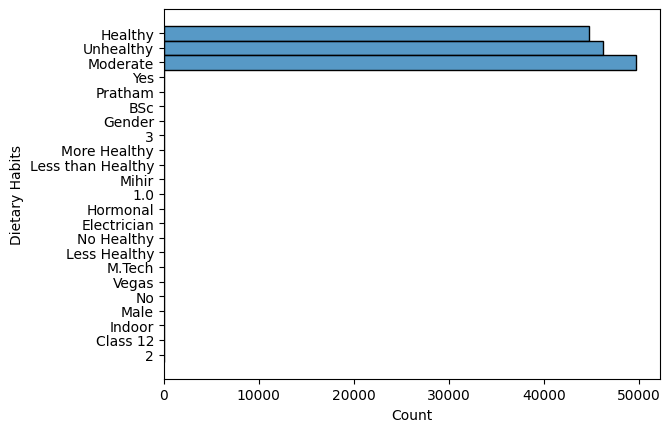

In [138]:
figsize=(20,10)
sns.histplot(data = df ,y='Dietary Habits');

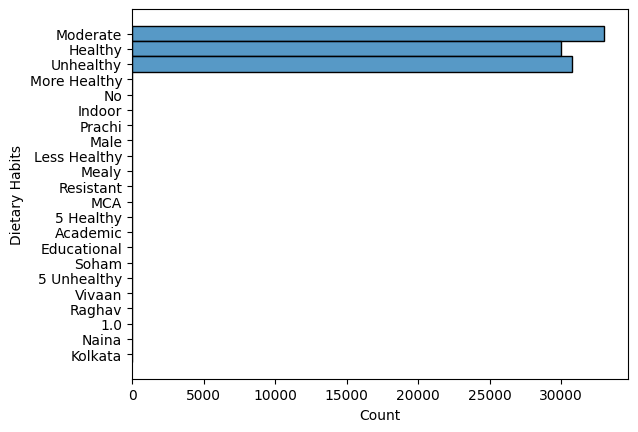

In [139]:
figsize=(20,10)
sns.histplot(data = test ,y='Dietary Habits');

In [140]:
df['Dietary Habits'].unique()

array(['Healthy', 'Unhealthy', 'Moderate', 'Yes', 'Pratham', 'BSc',
       'Gender', '3', 'More Healthy', 'Less than Healthy', 'Mihir', '1.0',
       'Hormonal', 'Electrician', nan, 'No Healthy', 'Less Healthy',
       'M.Tech', 'Vegas', 'No', 'Male', 'Indoor', 'Class 12', '2'],
      dtype=object)

In [141]:
Dietary_Habits={
    'More Healty':0,
    'Healthy':1,
    'Less than Healthy':2,
    'Less Healthy':2,
    'Moderate':3,
    'Unhealthy':4,   
    'No Healthy':4,
}

df['Dietary Habits'] = df['Dietary Habits'].map(Dietary_Habits)
test['Dietary Habits'] = test['Dietary Habits'].map(Dietary_Habits)

In [142]:
missing_values_count = test.isnull().sum()
missing_values_count

id                                           0
Name                                         0
Gender                                       0
Age                                          0
City                                         0
Working Professional or Student              0
Profession                                   0
Academic Pressure                            0
Work Pressure                                0
CGPA                                     75034
Study Satisfaction                           0
Job Satisfaction                             0
Sleep Duration                               0
Dietary Habits                              29
Degree                                    2211
Have you ever had suicidal thoughts ?        0
Work/Study Hours                             0
Financial Stress                             0
Family History of Mental Illness             0
dtype: int64

In [143]:
missing_values_count = df.isnull().sum()
missing_values_count

id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                    0
Academic Pressure                             0
Work Pressure                                 0
CGPA                                     112802
Study Satisfaction                            0
Job Satisfaction                              0
Sleep Duration                                0
Dietary Habits                               24
Degree                                     3379
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64

In [144]:
Dietary_Habits_med=df['Dietary Habits'].median()
df.fillna({'Dietary Habits':Dietary_Habits_med}, inplace=True)
test.fillna({'Dietary Habits':Dietary_Habits_med}, inplace=True)

In [145]:
missing_values_count = test.isnull().sum()
missing_values_count

id                                           0
Name                                         0
Gender                                       0
Age                                          0
City                                         0
Working Professional or Student              0
Profession                                   0
Academic Pressure                            0
Work Pressure                                0
CGPA                                     75034
Study Satisfaction                           0
Job Satisfaction                             0
Sleep Duration                               0
Dietary Habits                               0
Degree                                    2211
Have you ever had suicidal thoughts ?        0
Work/Study Hours                             0
Financial Stress                             0
Family History of Mental Illness             0
dtype: int64

In [146]:
missing_values_count = df.isnull().sum()
missing_values_count

id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                    0
Academic Pressure                             0
Work Pressure                                 0
CGPA                                     112802
Study Satisfaction                            0
Job Satisfaction                              0
Sleep Duration                                0
Dietary Habits                                0
Degree                                     3379
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64

In [147]:
df.fillna({'Degree': 'Unknown'}, inplace=True)
test.fillna({'Degree': 'Unknown'}, inplace=True)

In [148]:
missing_values_count = test.isnull().sum()
missing_values_count

id                                           0
Name                                         0
Gender                                       0
Age                                          0
City                                         0
Working Professional or Student              0
Profession                                   0
Academic Pressure                            0
Work Pressure                                0
CGPA                                     75034
Study Satisfaction                           0
Job Satisfaction                             0
Sleep Duration                               0
Dietary Habits                               0
Degree                                       0
Have you ever had suicidal thoughts ?        0
Work/Study Hours                             0
Financial Stress                             0
Family History of Mental Illness             0
dtype: int64

In [149]:
missing_values_count = df.isnull().sum()
missing_values_count

id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                    0
Academic Pressure                             0
Work Pressure                                 0
CGPA                                     112802
Study Satisfaction                            0
Job Satisfaction                              0
Sleep Duration                                0
Dietary Habits                                0
Degree                                        0
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64

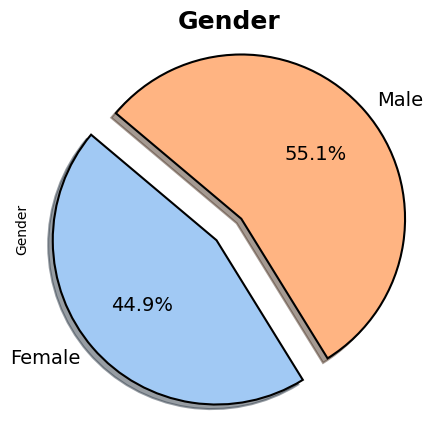

In [150]:
plot_data('Gender', df['Gender'])

# **3-Data Preparation & Classification**

In [151]:
df.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,2.0,5.0,NaN,3.0,5.0,9.0,1.0,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,3.0,2.0,NaN,1.0,2.0,4.0,4.0,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,Student,3.0,3.0,8.97,1.0,2.0,5.5,1.0,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,3.0,2.0,NaN,4.0,2.0,4.0,3.0,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,3.0,2.0,NaN,4.0,2.0,5.5,4.0,BBA,Yes,9.0,4.0,Yes,0


<div style="background-color: green; padding: 20px; border-radius: 25px; ">
<font color='white' size="5px">
Split Data
    </font>
</div>

In [152]:
# Separate target from predictors
y = df.Depression
X = df.drop(['id','Name','Depression'], axis=1)

# Divide data into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

print("The size of the input train data is: {}".format(X_train.shape))
print("The size of the output train data is: {}".format(y_train.shape))
print("The size of the input test data is: {}".format(X_test.shape))
print("The size of the output test data is: {}".format(y_test.shape))

The size of the input train data is: (112560, 17)
The size of the output train data is: (112560,)
The size of the input test data is: (28140, 17)
The size of the output test data is: (28140,)


<div style="background-color: green; padding: 20px; border-radius: 25px; ">
<font color='white' size="5px">
Select Numerica and Categorical Columns
    </font>
</div>

In [153]:
# "Cardinality" means the number of unique values in a column
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
categorical_cols = [cname for cname in X_train.columns if X_train[cname].dtype == "object"]

# Select numerical columns
numerical_cols = [cname for cname in X_train.columns if X_train[cname].dtype in ['int64', 'float64']]

# Keep selected columns only
my_cols = categorical_cols + numerical_cols
X_train = X_train[my_cols].copy()
X_test = X_test[my_cols].copy()

print("Categorical variables:")
print(categorical_cols)
print("numerical variables:")
print(numerical_cols)

Categorical variables:
['Gender', 'City', 'Working Professional or Student', 'Profession', 'Degree', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']
numerical variables:
['Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Work/Study Hours', 'Financial Stress']


<div style="background-color: green; padding: 20px; border-radius: 25px; ">
<font color='white' size="5px">
Preprocessing Data
    </font>
</div>

In [154]:
# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant')),
    ('scaler', StandardScaler()),
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

<div style="background-color: green; padding: 20px; border-radius: 25px; ">
<font color='white' size="5px">
Confusion Matrix Template
    </font>
</div>

In [155]:
#confusion matrix template
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

<div style="background-color: green; padding: 20px; border-radius: 25px; ">
<font color='white' size="5px">
Creat Pipeline and Train Voting Classifier
    </font>
</div>

[LightGBM] [Info] Number of positive: 20469, number of negative: 92091
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018276 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 550
[LightGBM] [Info] Number of data points in the train set: 112560, number of used features: 113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.181850 -> initscore=-1.503866
[LightGBM] [Info] Start training from score -1.503866


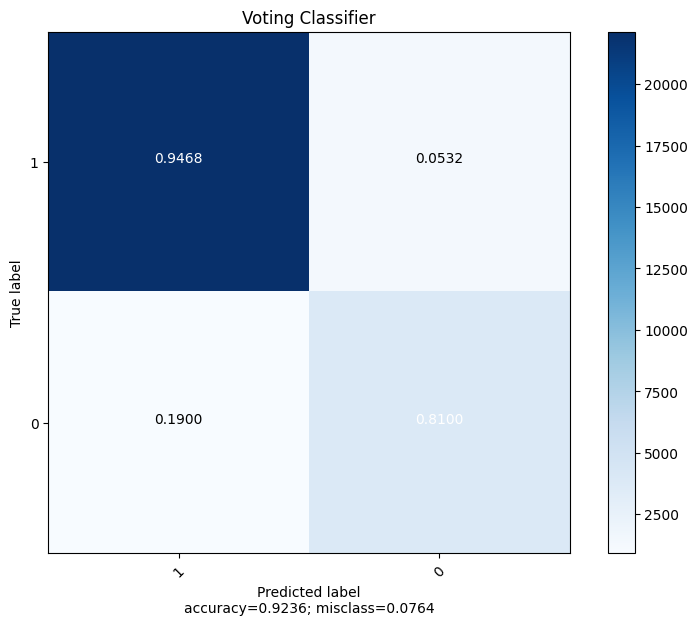

              precision    recall  f1-score   support

           0       0.96      0.95      0.95     23383
           1       0.76      0.81      0.78      4757

    accuracy                           0.92     28140
   macro avg       0.86      0.88      0.87     28140
weighted avg       0.93      0.92      0.92     28140



In [156]:
LR = LogisticRegression()
Tree = DecisionTreeClassifier()
RF = RandomForestClassifier()
SVM = SVC()
KNN = KNeighborsClassifier()
GB = GradientBoostingClassifier()
AB = AdaBoostClassifier()
LGBM = LGBMClassifier()

# Voting Classifier
model = VotingClassifier(
    estimators=[("Logistic Regression", LR), ("Decision Tree", Tree), ("Random Forest", RF),
               ("Support Vector Machine",SVM), ("k-nearest neighbor",KNN), ("Gradient Boosting",GB),
               ("AdaBoost",AB), ("LGBM", LGBM)],
    voting='hard',
)

# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                             ])

# Preprocessing of training data, fit model 
my_pipeline.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
prediction = my_pipeline.predict(X_test)

#Plot Result
cm = confusion_matrix(prediction,y_test)
#print(cm)
plot_confusion_matrix(cm,
                          target_names=['1', '0'],
                          title='Voting Classifier',
                          cmap=None,
                          normalize=True)
sk_report = classification_report(
    digits=2,
    y_true=prediction, 
    y_pred=y_test)
print(sk_report)

<div style="background-color: green; padding: 20px; border-radius: 25px; ">
<font color='white' size="5px">
Result
    </font>
</div>

In [157]:
X=test.drop(columns = ['id'],axis=1)
prediction = my_pipeline.predict(X)

In [158]:
sample_submission = pd.read_csv('/kaggle/input/playground-series-s4e11/sample_submission.csv')

In [159]:
sample_submission.head()

,id,Depression
0,140700,0
1,140701,0
2,140702,0
3,140703,0
4,140704,0


In [160]:
sample_submission['Depression'] = prediction
sample_submission.to_csv('submission.csv', index=False)

<div style="background-color: red; padding: 20px; border-radius: 25px; ">
<font color='white' size="5px">
If my notebook was useful for you, please give me a upvote. Thank you for your support ❤️
    </font>
</div>